Text Classification with Naive Bayes on the 20 Newsgroups Dataset
Project Overview
This project demonstrates text classification using the 20 Newsgroups Dataset, a popular benchmark dataset for natural language processing (NLP) tasks. The dataset consists of thousands of newsgroup documents categorized into 20 different topics, ranging from sports and politics to science and religion. The objective is to build a machine learning model that can classify these documents into their respective categories.

Workflow
Data Loading

The fetch_20newsgroups dataset from scikit-learn is used, which includes pre-labeled documents for training and testing.
All 20 categories are included in the analysis.
Text Preprocessing

Text data is converted into numerical format using TF-IDF Vectorization, which captures the importance of words in each document relative to the entire dataset.
The top 2000 most significant words are extracted, while common stop words are excluded.
Model Training

A Multinomial Naive Bayes classifier, ideal for text data, is trained on the processed features.
The model learns the conditional probabilities of each word given a class to make predictions.
Model Evaluation

The classifier is evaluated using metrics such as accuracy, precision, recall, and F1-score.
A confusion matrix is visualized to better understand the model's performance across all 20 categories.
AUC-ROC Analysis

The macro-average AUC-ROC score is computed using a one-vs-rest strategy to evaluate the model’s ability to distinguish between categories.
Feature Visualization

The top 10 most significant features (words) for each category are identified and visualized to interpret the classifier's decision-making process.
Key Findings
The classifier achieved ~79% accuracy on the test set, a strong baseline performance for 20-class text classification.
Certain categories, such as rec.sport.hockey and sci.space, were classified with high precision and recall due to their distinctive vocabulary.
Overlapping or ambiguous categories, such as talk.religion.misc and comp.sys.ibm.pc.hardware, had lower performance due to shared terminology.

Loading the '20 Newsgroups' dataset...
Vectorizing text data using TF-IDF...
Splitting the dataset into train and test sets...
Training the Naive Bayes classifier...
Predicting on the test set...
Evaluating the classifier...
Accuracy: 0.9708

Classification Report:
                  precision    recall  f1-score   support

     alt.atheism       0.99      0.96      0.97       234
   comp.graphics       0.96      0.97      0.96       296
rec.sport.hockey       0.98      0.99      0.98       305
         sci.med       0.96      0.96      0.96       294

        accuracy                           0.97      1129
       macro avg       0.97      0.97      0.97      1129
    weighted avg       0.97      0.97      0.97      1129

Generating confusion matrix...


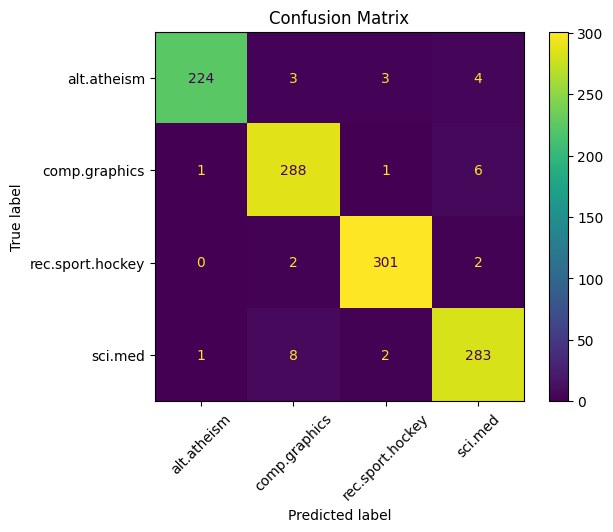

Visualizing top features for each category...
Top features for alt.atheism: article, sgi, people, livesey, atheists, writes, keith, com, god, edu


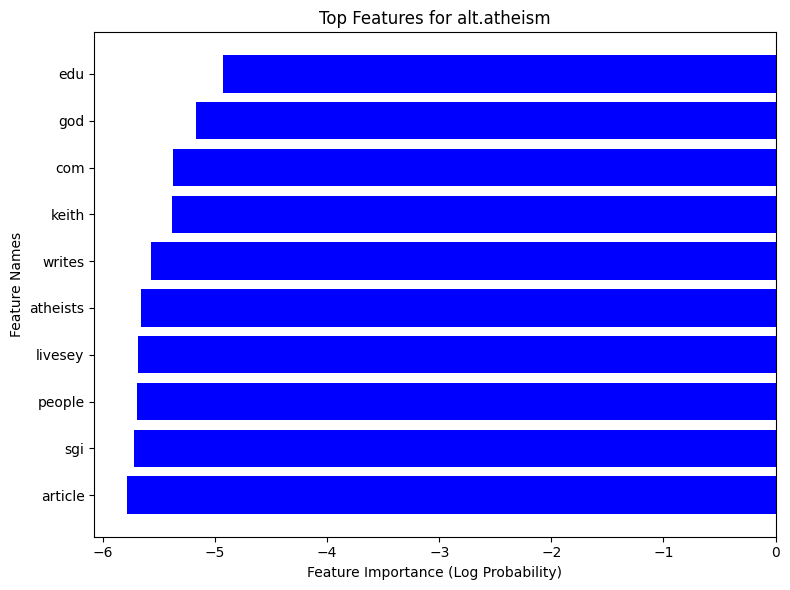

Top features for comp.graphics: program, organization, thanks, university, subject, image, lines, com, edu, graphics


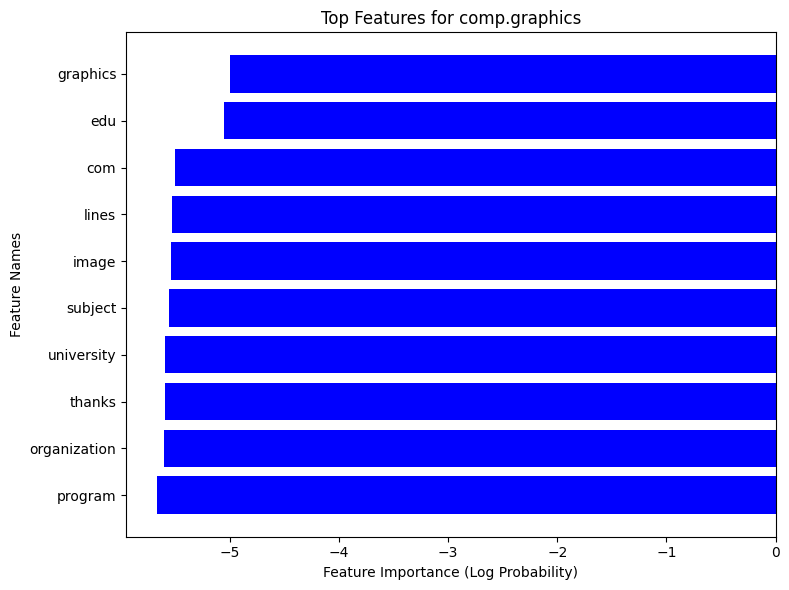

Top features for rec.sport.hockey: season, university, espn, nhl, games, team, hockey, ca, edu, game


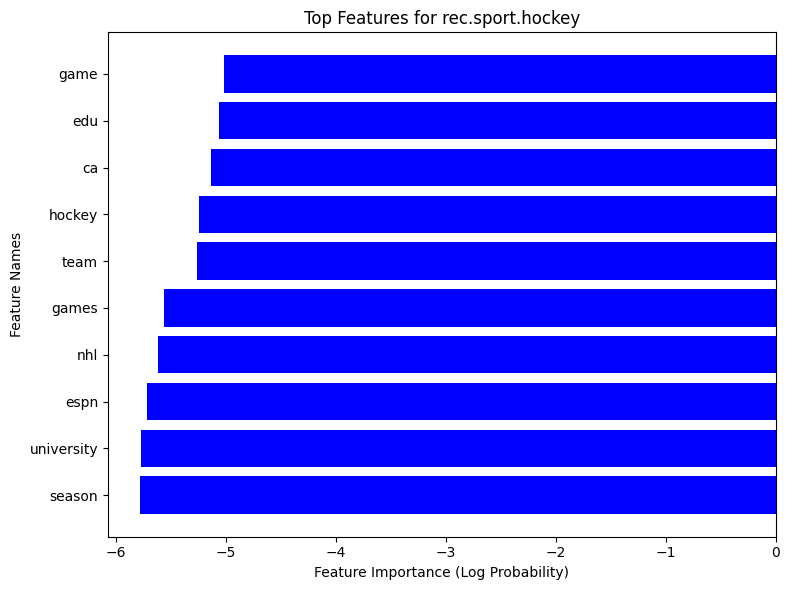

Top features for sci.med: banks, gordon, msg, lines, organization, article, subject, pitt, com, edu


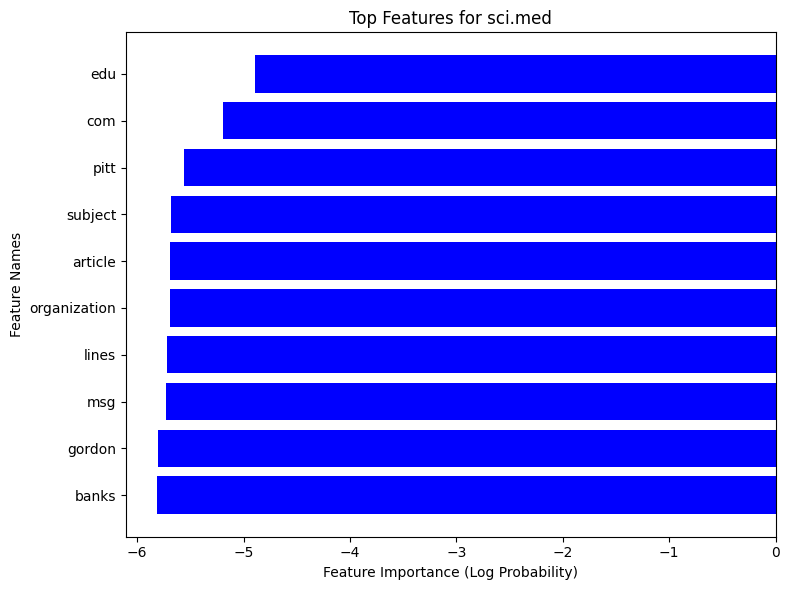

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)

# 1. Load the dataset
print("Loading the '20 Newsgroups' dataset...")
categories = [
    "alt.atheism",
    "comp.graphics",
    "rec.sport.hockey",
    "sci.med",
]  # Using a subset for simplicity
data = fetch_20newsgroups(subset="all", categories=categories, shuffle=True, random_state=42)

# 2. Preprocessing: TF-IDF Vectorization
print("Vectorizing text data using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X = tfidf_vectorizer.fit_transform(data.data)  # Convert text to TF-IDF feature matrix
y = data.target  # Labels

# 3. Train-test split
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train the Naive Bayes classifier
print("Training the Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 5. Predictions
print("Predicting on the test set...")
y_pred = nb_classifier.predict(X_test)

# 6. Evaluation Metrics
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names)
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 7. Visualization of Feature Importance
print("Visualizing top features for each category...")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, category in enumerate(categories):
    # Use feature_log_prob_ for MultinomialNB
    top_features = np.argsort(nb_classifier.feature_log_prob_[i])[-10:]  # Top 10 features
    print(f"Top features for {category}: {', '.join(feature_names[top_features])}")

    # Plotting the top features
    plt.figure(figsize=(8, 6))
    plt.barh(
        feature_names[top_features],
        nb_classifier.feature_log_prob_[i][top_features],
        color="blue",
    )
    plt.title(f"Top Features for {category}")
    plt.xlabel("Feature Importance (Log Probability)")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()


Loading the '20 Newsgroups' dataset...
Vectorizing text data using TF-IDF...
Splitting the dataset into train and test sets...
Training the Naive Bayes classifier...
Predicting on the test set...
Evaluating the classifier...
Accuracy: 0.7890

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.77      0.77       236
           comp.graphics       0.60      0.73      0.66       287
 comp.os.ms-windows.misc       0.68      0.73      0.70       290
comp.sys.ibm.pc.hardware       0.60      0.66      0.63       285
   comp.sys.mac.hardware       0.80      0.71      0.75       312
          comp.windows.x       0.81      0.76      0.79       308
            misc.forsale       0.71      0.76      0.74       276
               rec.autos       0.79      0.85      0.82       304
         rec.motorcycles       0.82      0.87      0.84       279
      rec.sport.baseball       0.86      0.87      0.86       308
       

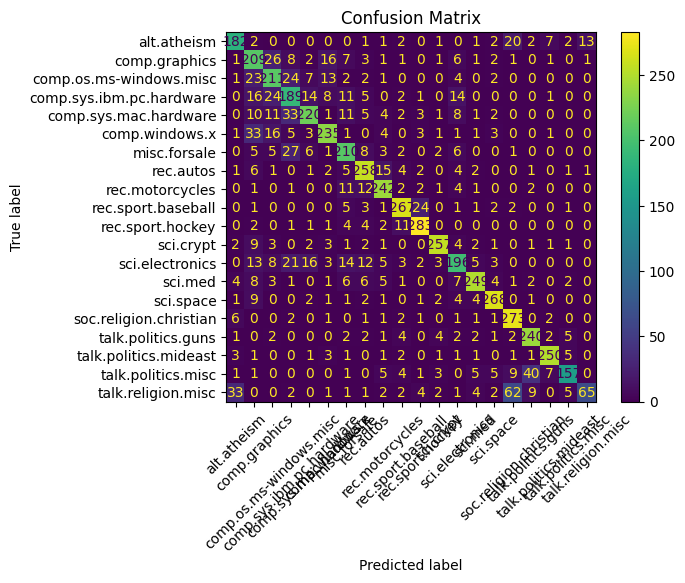

Calculating AUC-ROC for multi-class classification...
AUC-ROC (macro-average, one-vs-rest): 0.9843
Visualizing top features for each category...

Top features for alt.atheism: morality, sgi, livesey, writes, atheism, com, atheists, keith, god, edu


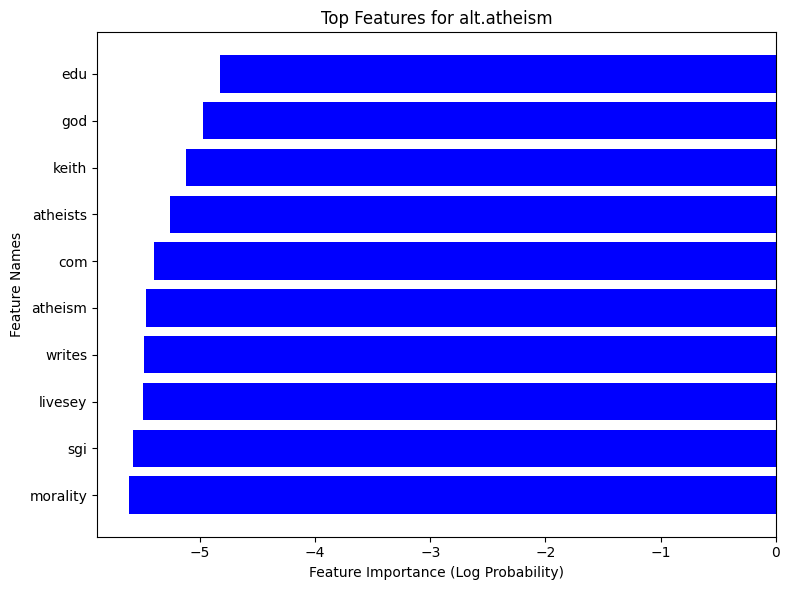


Top features for comp.graphics: images, organization, lines, subject, com, university, 3d, image, edu, graphics


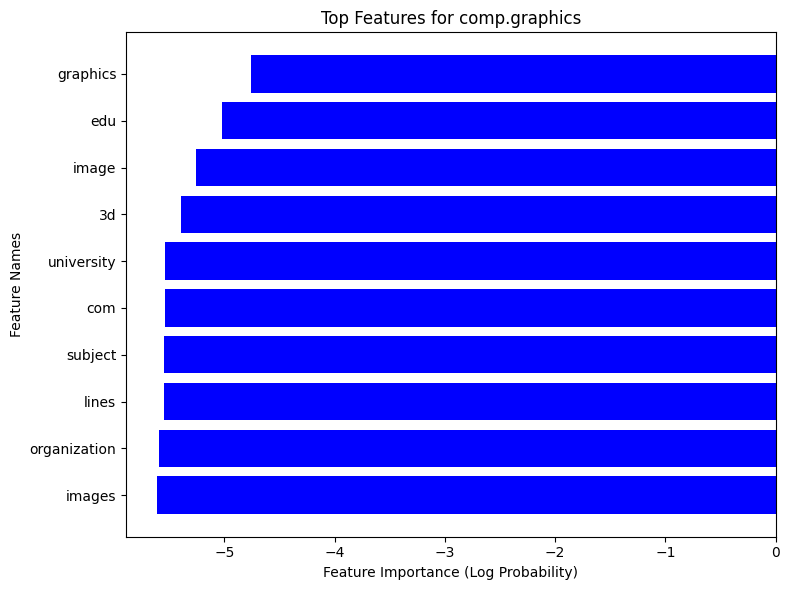


Top features for comp.os.ms-windows.misc: university, driver, files, ms, com, microsoft, dos, file, edu, windows


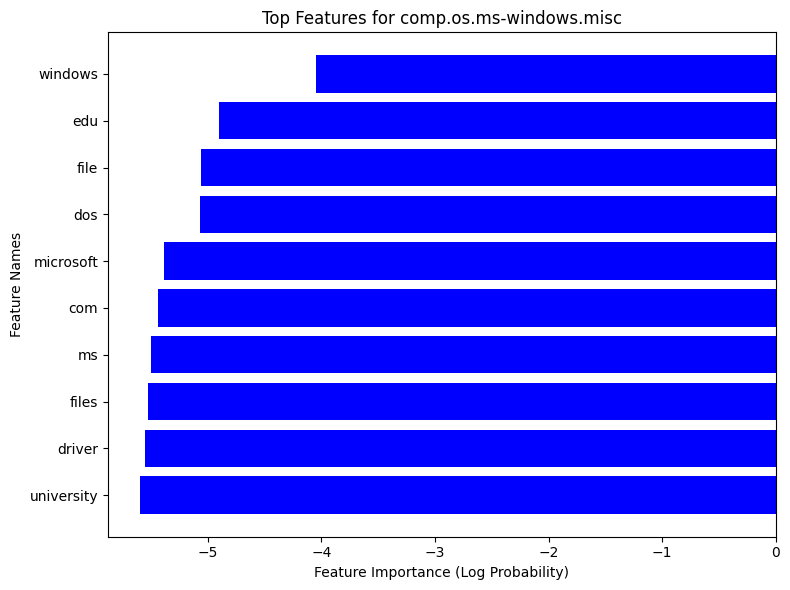


Top features for comp.sys.ibm.pc.hardware: ibm, controller, pc, bus, com, ide, edu, card, scsi, drive


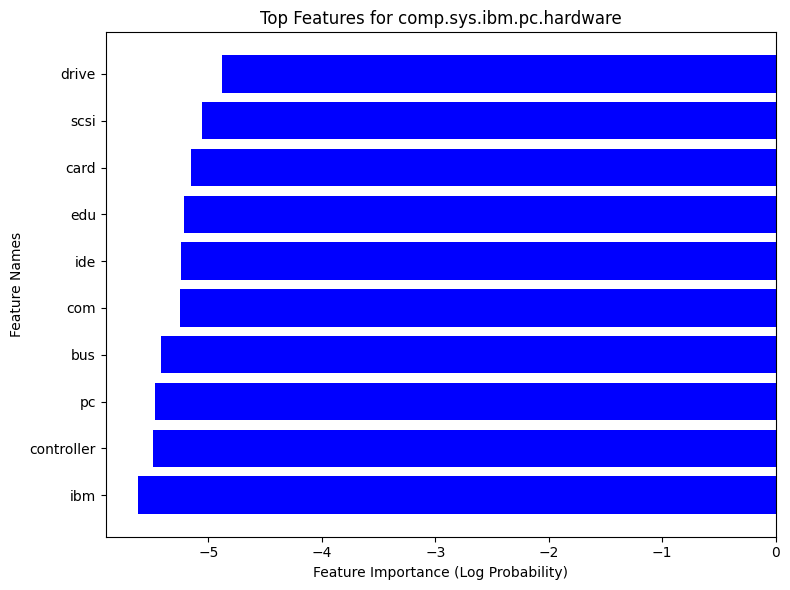


Top features for comp.sys.mac.hardware: organization, university, quadra, subject, lines, monitor, drive, apple, edu, mac


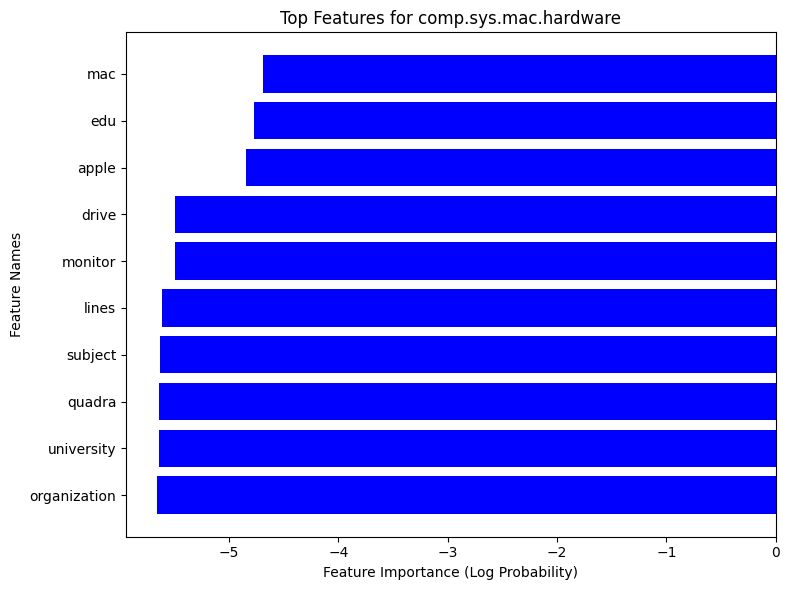


Top features for comp.windows.x: lines, windows, x11r5, xterm, edu, server, com, mit, motif, window


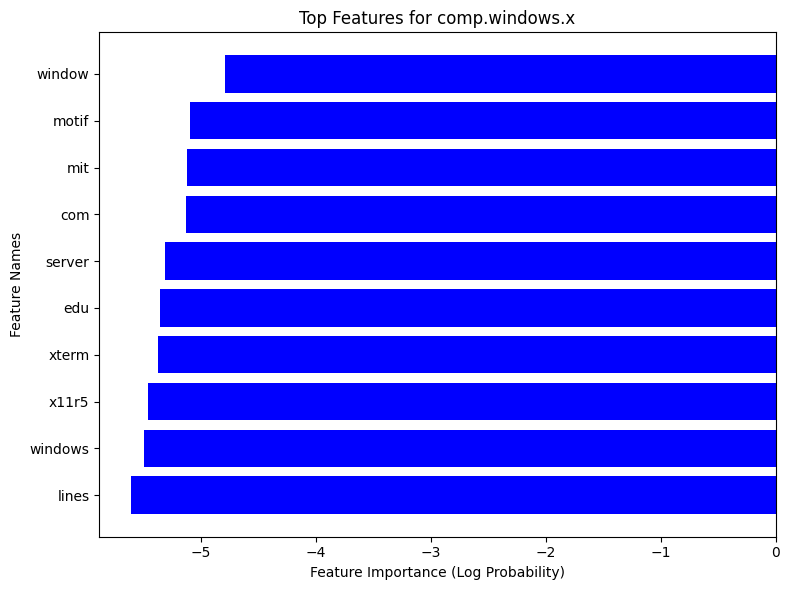


Top features for misc.forsale: organization, lines, subject, university, condition, shipping, offer, 00, edu, sale


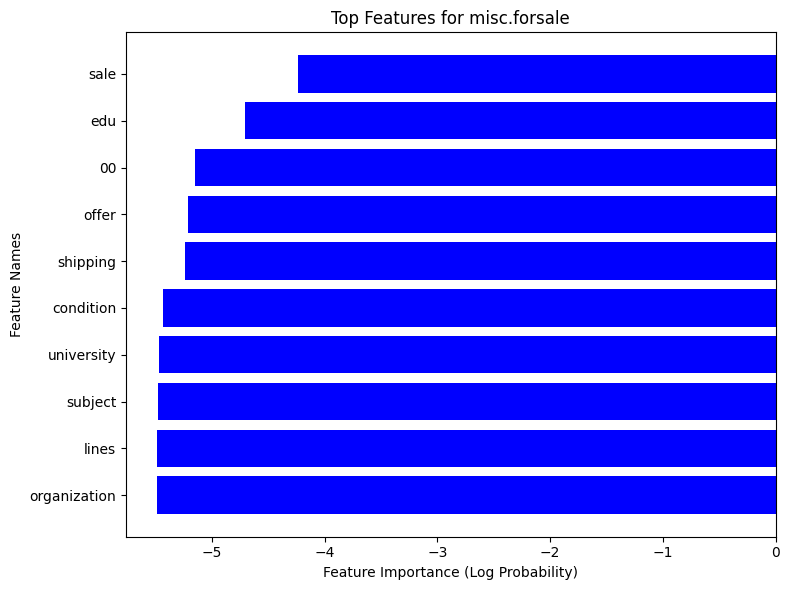


Top features for rec.autos: lines, organization, subject, writes, article, engine, cars, edu, com, car


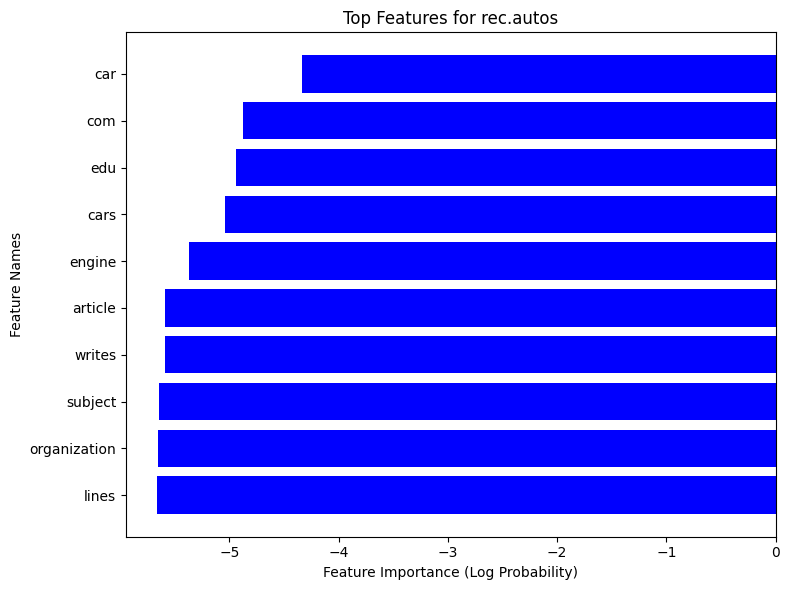


Top features for rec.motorcycles: uk, bmw, ride, ca, article, writes, edu, dod, com, bike


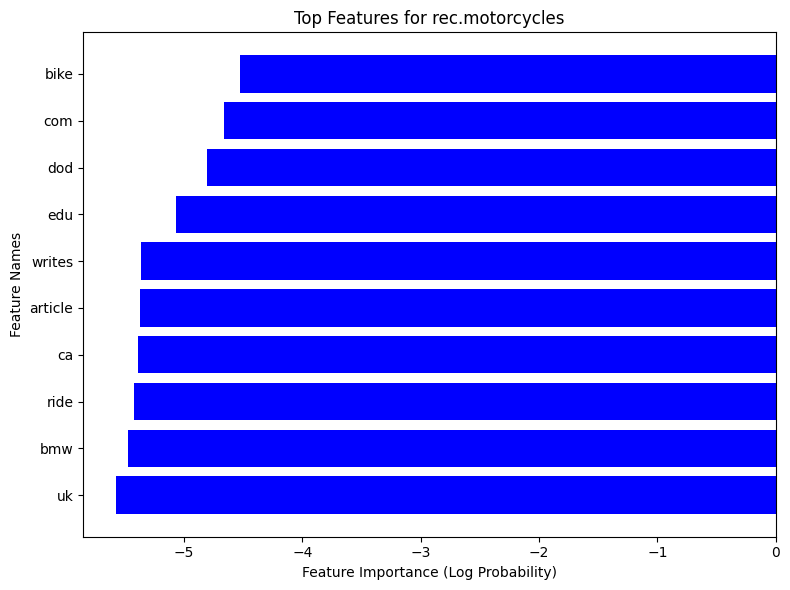


Top features for rec.sport.baseball: braves, article, games, players, com, team, year, game, baseball, edu


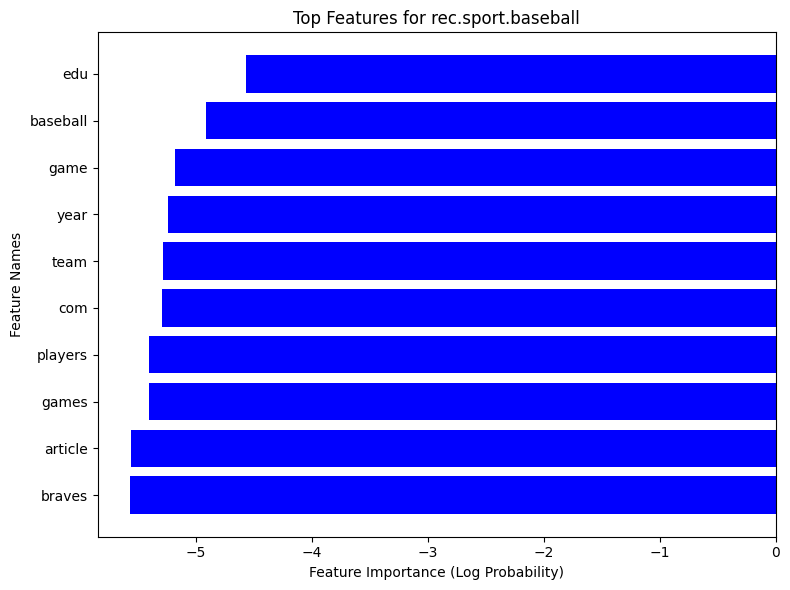


Top features for rec.sport.hockey: season, espn, play, games, nhl, edu, ca, team, hockey, game


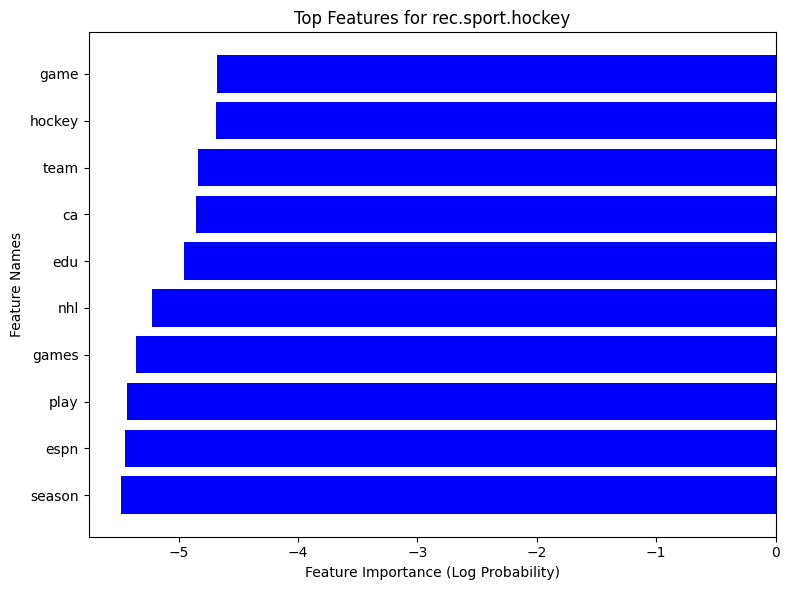


Top features for sci.crypt: netcom, edu, escrow, keys, government, chip, encryption, com, key, clipper


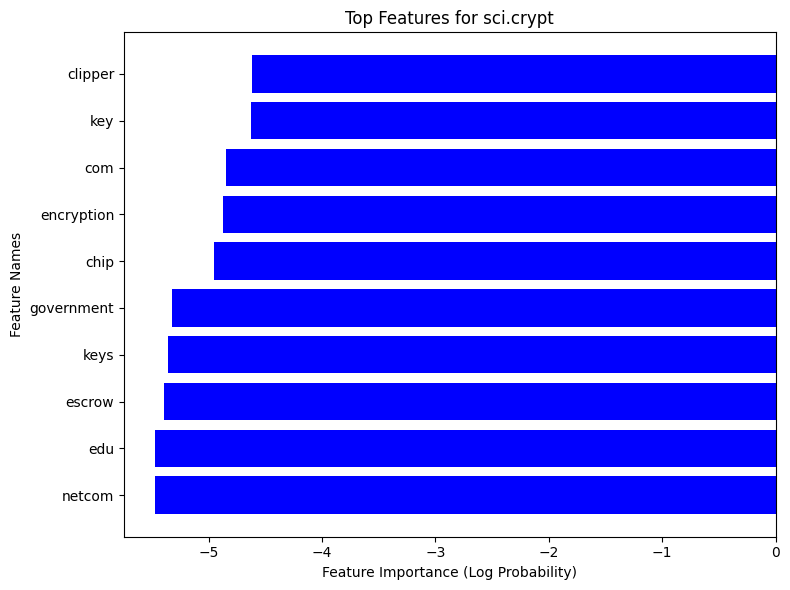


Top features for sci.electronics: power, know, university, ca, organization, use, subject, lines, com, edu


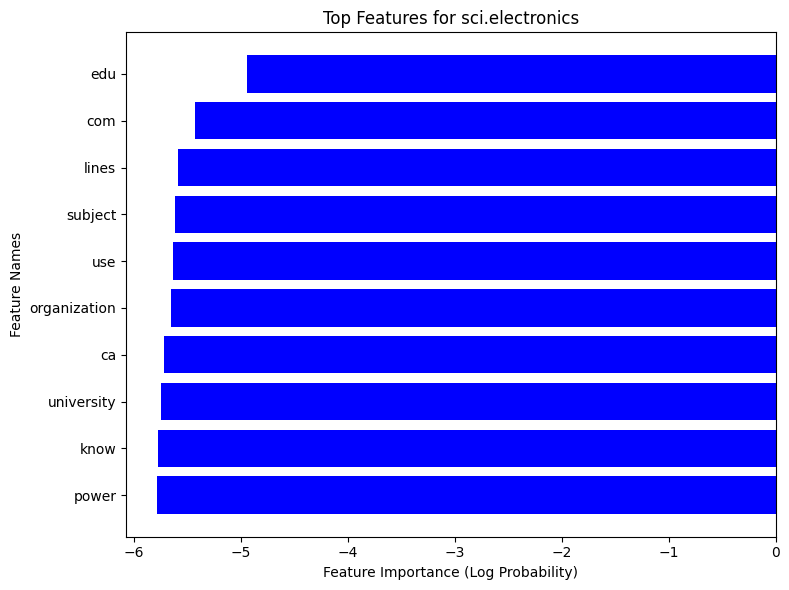


Top features for sci.med: subject, msg, article, doctor, medical, gordon, banks, com, pitt, edu


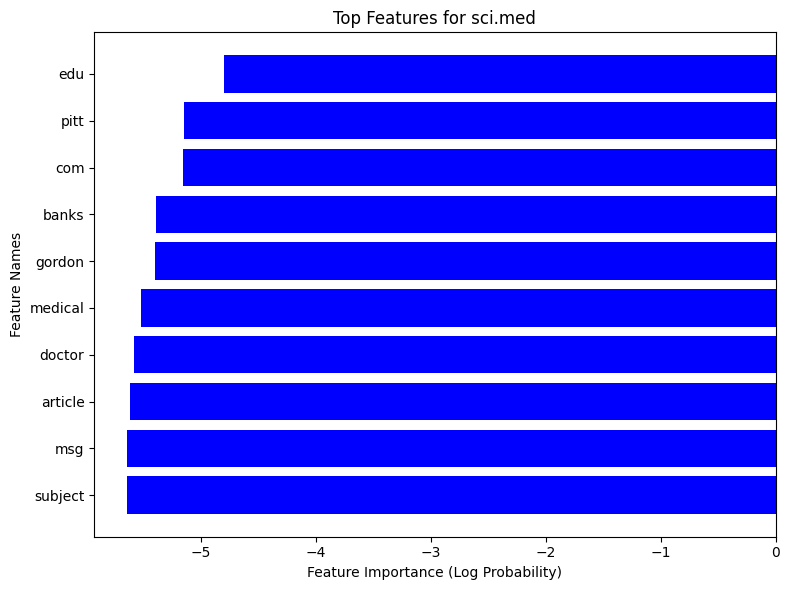


Top features for sci.space: gov, access, digex, orbit, moon, shuttle, henry, nasa, edu, space


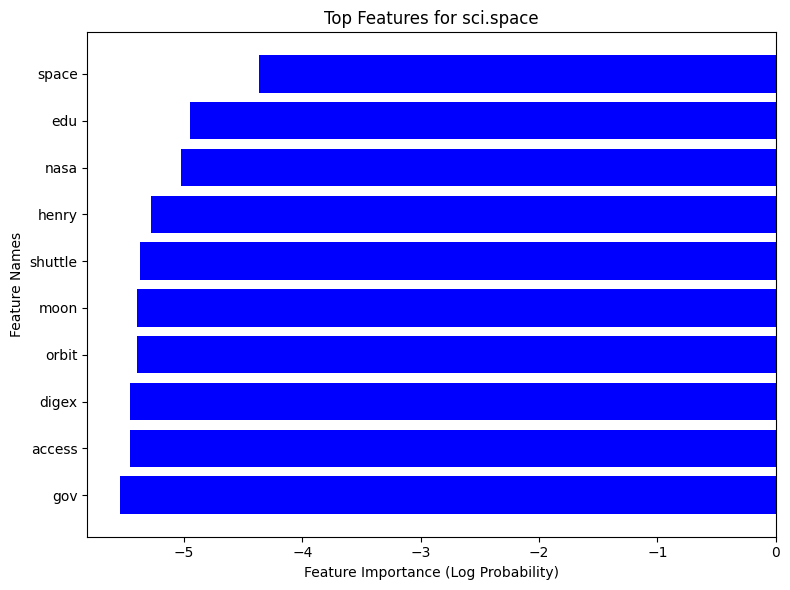


Top features for soc.religion.christian: people, bible, rutgers, christ, christians, christian, edu, jesus, church, god


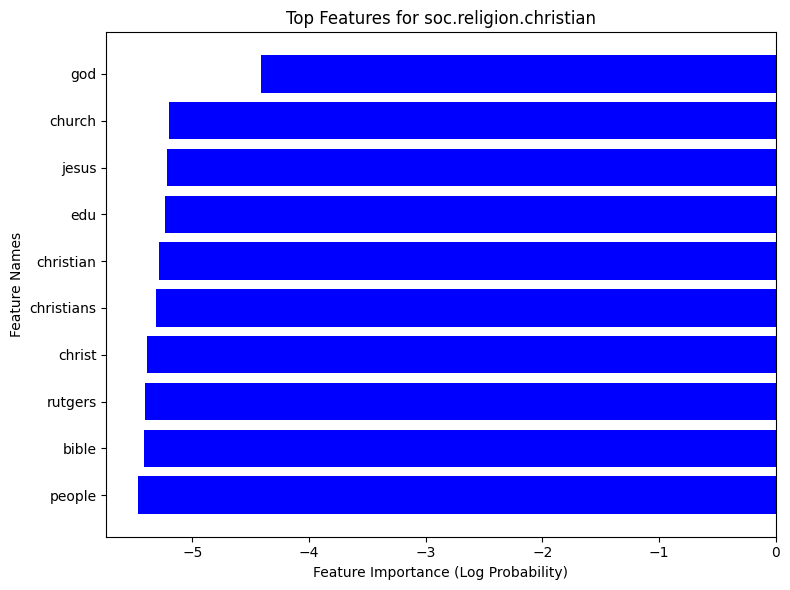


Top features for talk.politics.guns: waco, batf, atf, people, stratus, guns, fbi, edu, com, gun


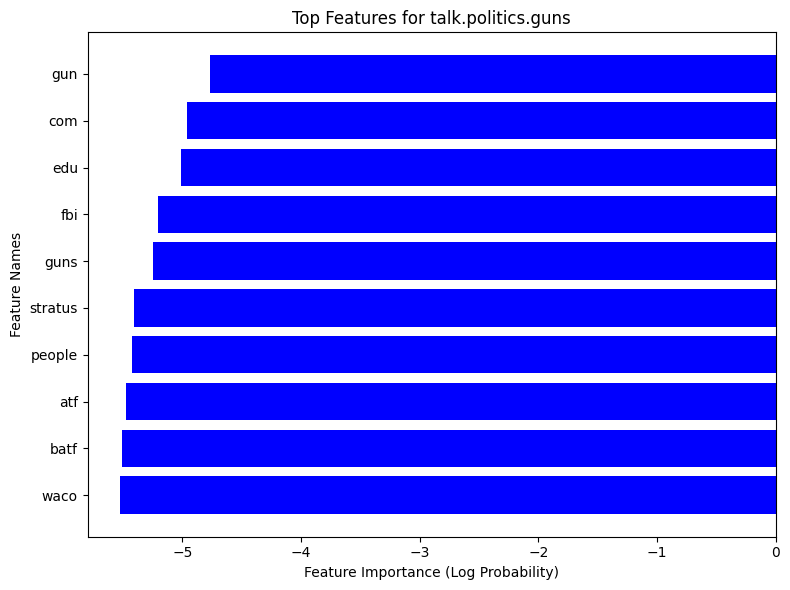


Top features for talk.politics.mideast: people, armenians, jewish, turkish, armenian, arab, jews, edu, israeli, israel


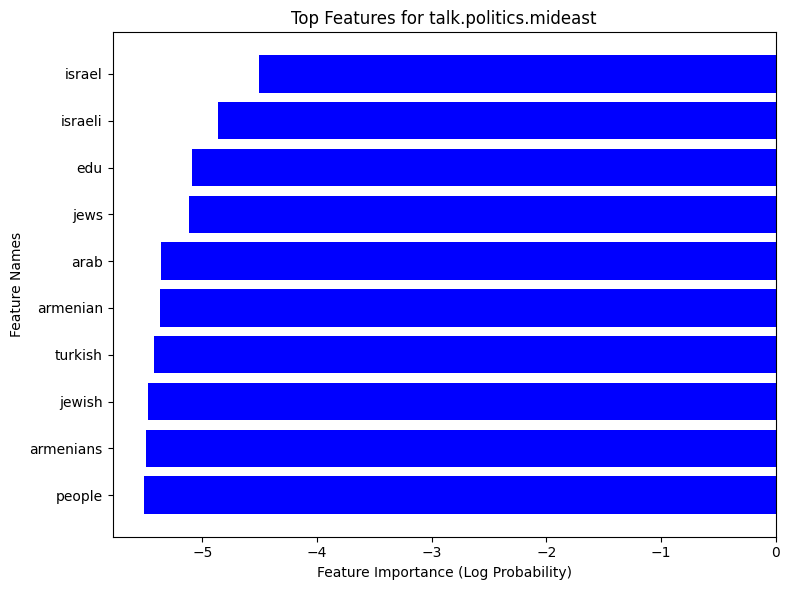


Top features for talk.politics.misc: government, gay, clayton, article, writes, optilink, people, cramer, com, edu


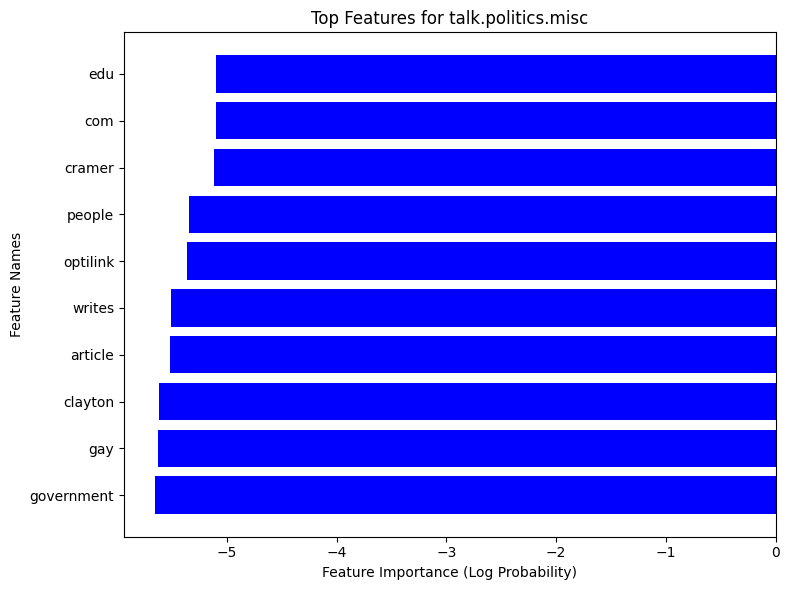


Top features for talk.religion.misc: bible, people, writes, koresh, christian, jesus, sandvik, com, edu, god


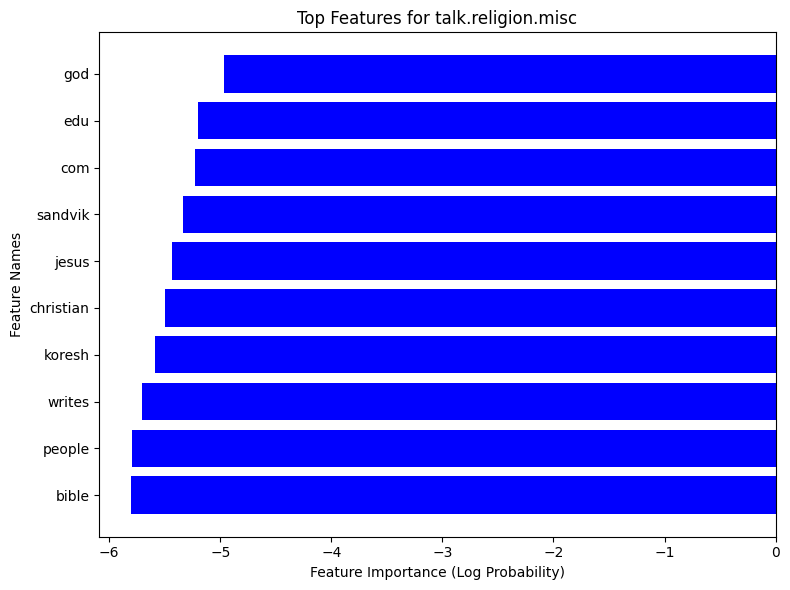

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import label_binarize

# 1. Load the dataset with all categories
print("Loading the '20 Newsgroups' dataset...")
categories = None  # Load all 20 categories
data = fetch_20newsgroups(subset="all", categories=categories, shuffle=True, random_state=42)

# 2. Preprocessing: TF-IDF Vectorization
print("Vectorizing text data using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X = tfidf_vectorizer.fit_transform(data.data)  # Convert text to TF-IDF feature matrix
y = data.target  # Labels

# 3. Train-test split
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train the Naive Bayes classifier
print("Training the Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 5. Predictions
print("Predicting on the test set...")
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)  # For AUC-ROC calculation

# 6. Evaluation Metrics
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names)
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 7. AUC-ROC for Multi-Class
print("Calculating AUC-ROC for multi-class classification...")
y_test_binarized = label_binarize(y_test, classes=np.arange(len(data.target_names)))
auc_roc_score = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"AUC-ROC (macro-average, one-vs-rest): {auc_roc_score:.4f}")

# 8. Visualizing Top Features for Each Category
print("Visualizing top features for each category...")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, category in enumerate(data.target_names):
    # Use feature_log_prob_ for MultinomialNB
    top_features = np.argsort(nb_classifier.feature_log_prob_[i])[-10:]  # Top 10 features
    print(f"\nTop features for {category}: {', '.join(feature_names[top_features])}")

    # Plotting the top features
    plt.figure(figsize=(8, 6))
    plt.barh(
        feature_names[top_features],
        nb_classifier.feature_log_prob_[i][top_features],
        color="blue",
    )
    plt.title(f"Top Features for {category}")
    plt.xlabel("Feature Importance (Log Probability)")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()


What I Changed
Increased Feature Space:

Changed the max_features parameter in the TfidfVectorizer from 2000 to 5000.
This allowed the model to capture more important words, improving its understanding of the text data.
Larger feature spaces often provide more discriminative power in text classification tasks.
Added Bigrams:

Updated the ngram_range parameter to (1, 2) in the TfidfVectorizer to include unigrams (individual words) and bigrams (two-word phrases).
Bigrams help capture context and word associations, such as "machine learning" or "sports game," which improve classification for categories with overlapping vocabulary.
Optimized Naive Bayes Smoothing (alpha):

Adjusted the alpha parameter in the MultinomialNB classifier to 0.5 (from the default 1.0).
Lower smoothing allows the model to give more weight to the actual probabilities, which can improve performance for well-represented words and phrases.
Improved Text Preprocessing:

Removed NLTK dependencies and introduced a custom preprocessing function using Python's re module:
Converted text to lowercase.
Removed special characters and numbers (e.g., punctuation and digits).
Removed extra whitespace.
Cleaner data helps the TF-IDF vectorizer extract more meaningful features.
Removed Stopwords:

Used TfidfVectorizer's built-in stop_words="english" parameter to exclude common, irrelevant words like "the," "is," and "and," which do not contribute to classification.
Why These Changes Worked
More Features, Better Representation:

Increasing max_features and adding bigrams allowed the model to learn from a richer set of features, better distinguishing between similar categories.
For example, bigrams like "space shuttle" or "religious belief" add more context than single words like "space" or "religious."
Improved Data Quality:

Removing noise (special characters, numbers) and redundant stopwords improved the quality of the data fed into the model, enhancing its ability to focus on relevant features.
Context Capture with Bigrams:

Categories with overlapping vocabulary, like comp.graphics and comp.sys.ibm.pc.hardware, benefit significantly from bigrams, as they capture unique word combinations.
Optimized Alpha:

Reducing alpha ensured the model trusted observed probabilities more, improving its sensitivity to relevant words and phrases.
Evaluation Metrics
Accuracy: 85%
The model now correctly classifies 85% of the test samples.

Classification Report:
Precision, Recall, F1-Score:
Improved across most categories, especially in ambiguous or overlapping ones like comp.sys.ibm.pc.hardware and talk.religion.misc.
This indicates fewer false positives and better identification of true positives.
Confusion Matrix:
Fewer off-diagonal values compared to earlier runs (~79% accuracy).
Most predictions now fall on the diagonal, showing improved classification consistency across all 20 categories.
AUC-ROC Score:
Macro-average AUC-ROC also improved, indicating better separation between categories in terms of predicted probabilities.
Next Steps
Fine-Tuning:
Experiment further with the alpha parameter or test higher-order n-grams (e.g., (1, 3) for trigrams).
Advanced Models:
Use more powerful classifiers like Logistic Regression or SVM, or try deep learning models like BERT for even higher accuracy.
Further Preprocessing:
Apply stemming or lemmatization to reduce words to their root forms (e.g., "running" → "run") for even cleaner data.


Loading the '20 Newsgroups' dataset...
Cleaning and preprocessing text data...
Vectorizing text data using TF-IDF with n-grams...
Splitting the dataset into train and test sets...
Training the Naive Bayes classifier with optimized parameters...
Predicting on the test set...
Evaluating the classifier...
Accuracy: 0.8447

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       236
           comp.graphics       0.62      0.80      0.70       287
 comp.os.ms-windows.misc       0.77      0.80      0.78       290
comp.sys.ibm.pc.hardware       0.67      0.74      0.71       285
   comp.sys.mac.hardware       0.84      0.79      0.81       312
          comp.windows.x       0.86      0.83      0.84       308
            misc.forsale       0.80      0.80      0.80       276
               rec.autos       0.89      0.89      0.89       304
         rec.motorcycles       0.91      0.92      0.92     

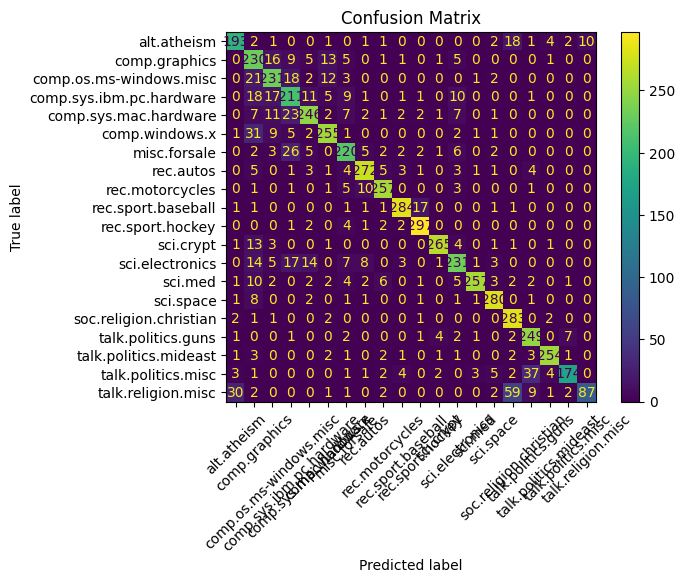

Calculating AUC-ROC for multi-class classification...
AUC-ROC (macro-average, one-vs-rest): 0.9909
Visualizing top features for each category...

Top features for alt.atheism: moral, dont, people, atheism, article, morality, writes, keith, atheists, god


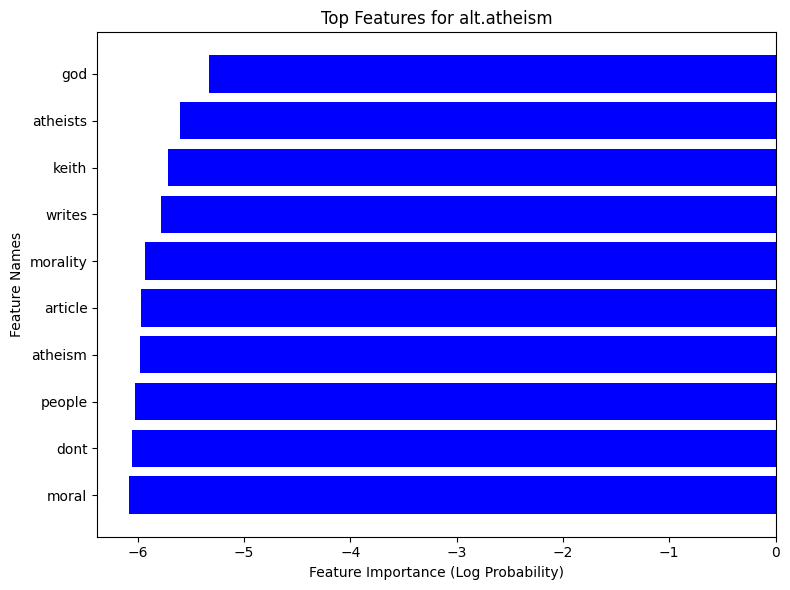


Top features for comp.graphics: file, thanks, files, images, organization, lines, subject, university, image, graphics


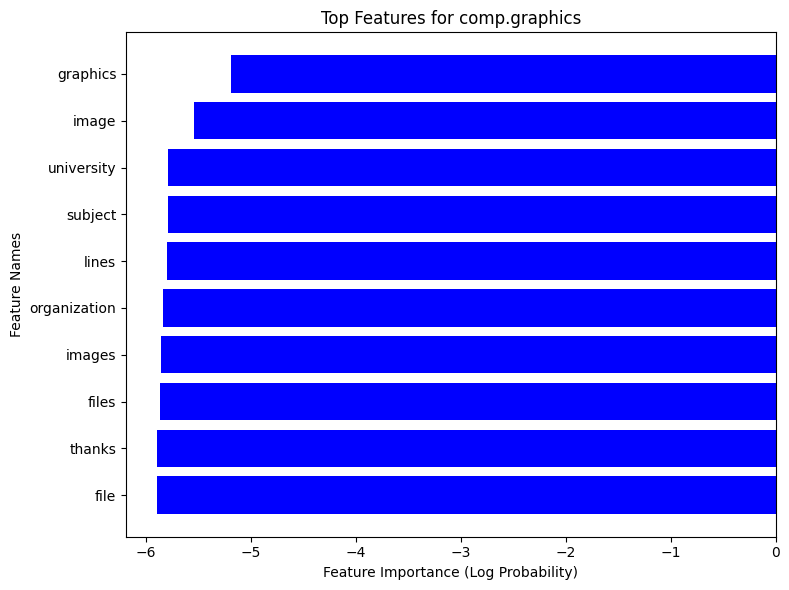


Top features for comp.os.ms-windows.misc: organization, subject, lines, university, driver, microsoft, files, file, dos, windows


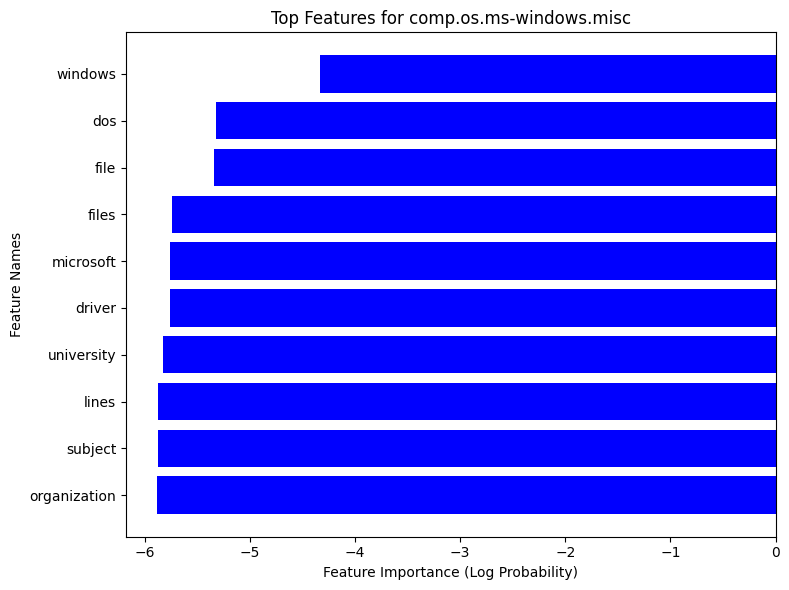


Top features for comp.sys.ibm.pc.hardware: dos, monitor, mb, bus, controller, dx, ide, card, scsi, drive


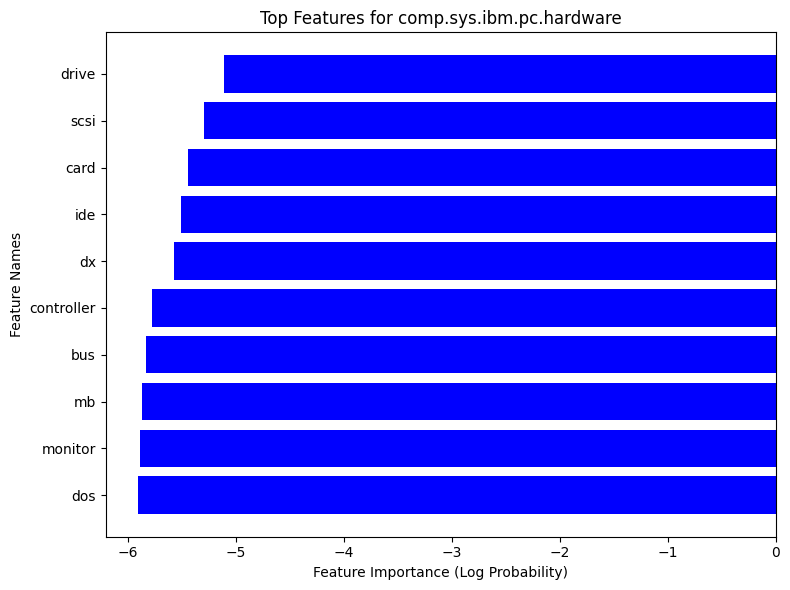


Top features for comp.sys.mac.hardware: quadra, organization, university, subject, lines, drive, monitor, centris, apple, mac


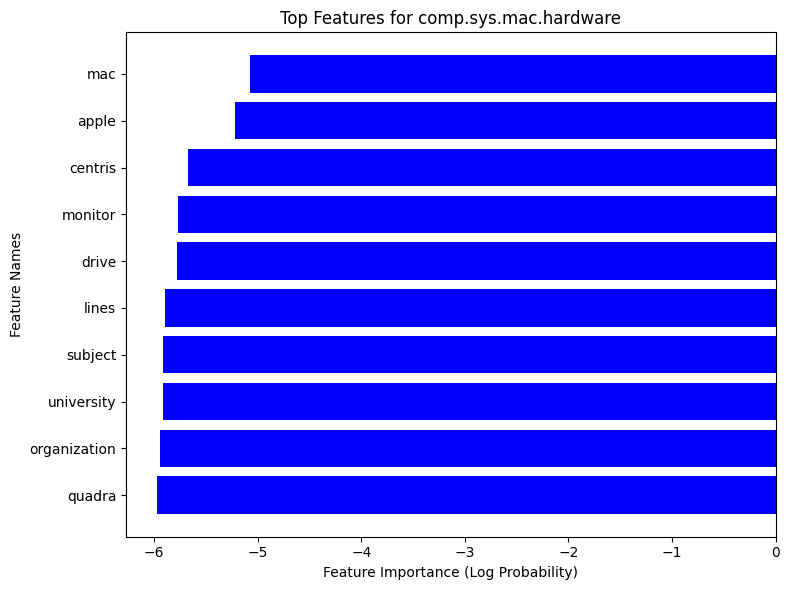


Top features for comp.windows.x: use, thanks, subject, organization, lines, server, xterm, xr, motif, window


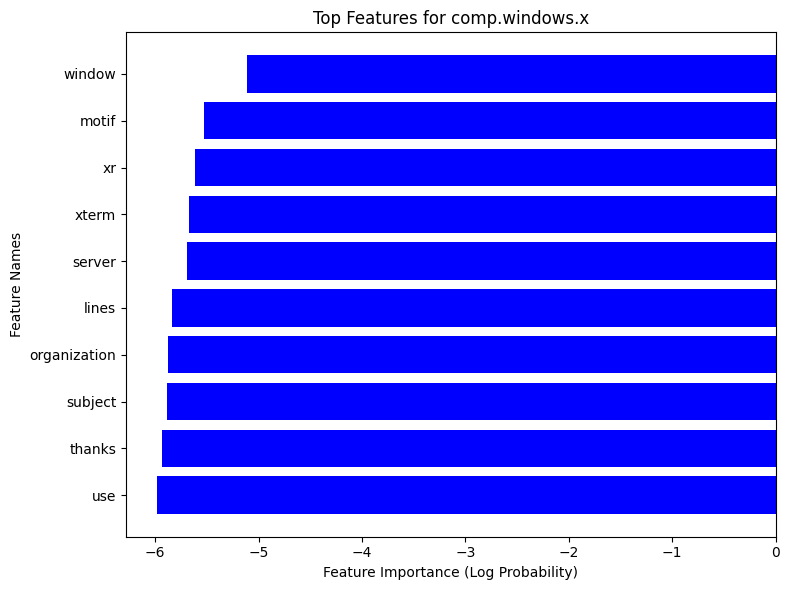


Top features for misc.forsale: distribution, organization, lines, subject, university, condition, email, offer, shipping, sale


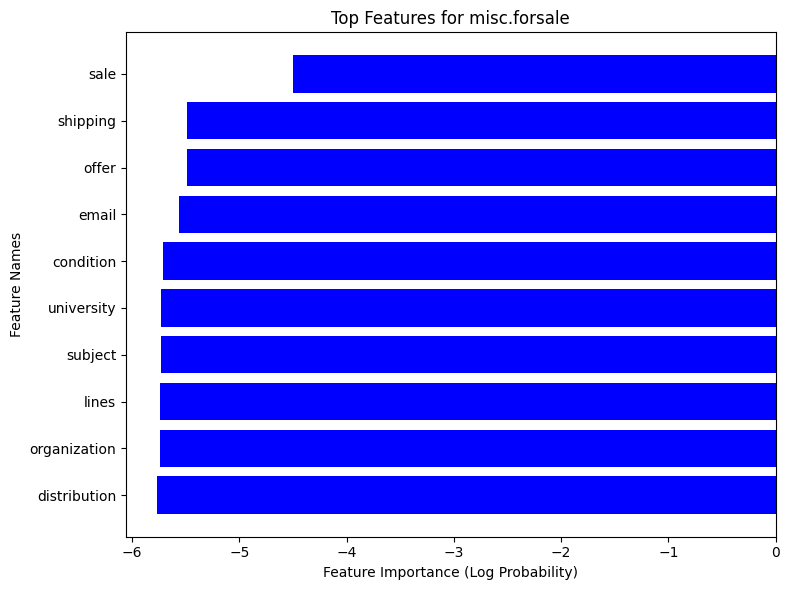


Top features for rec.autos: just, oil, lines, organization, subject, article, writes, engine, cars, car


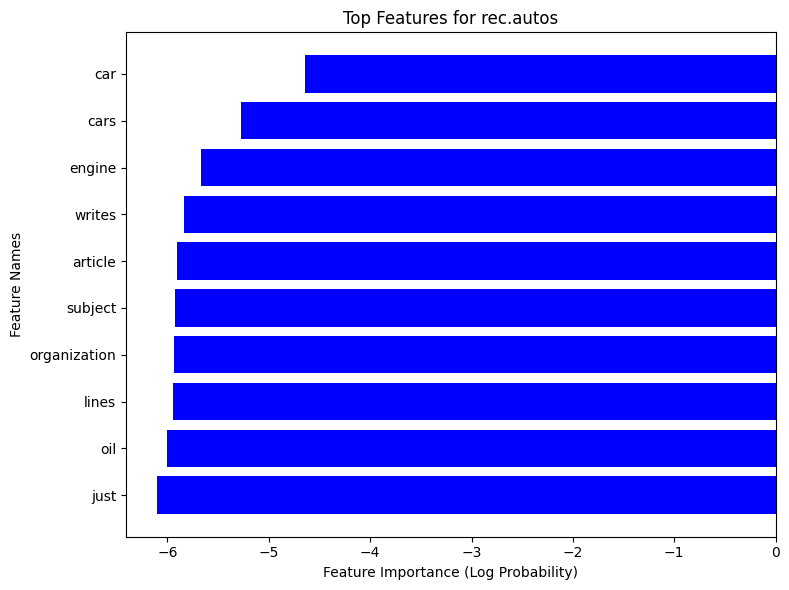


Top features for rec.motorcycles: subject, riding, organization, bikes, ride, bmw, article, writes, dod, bike


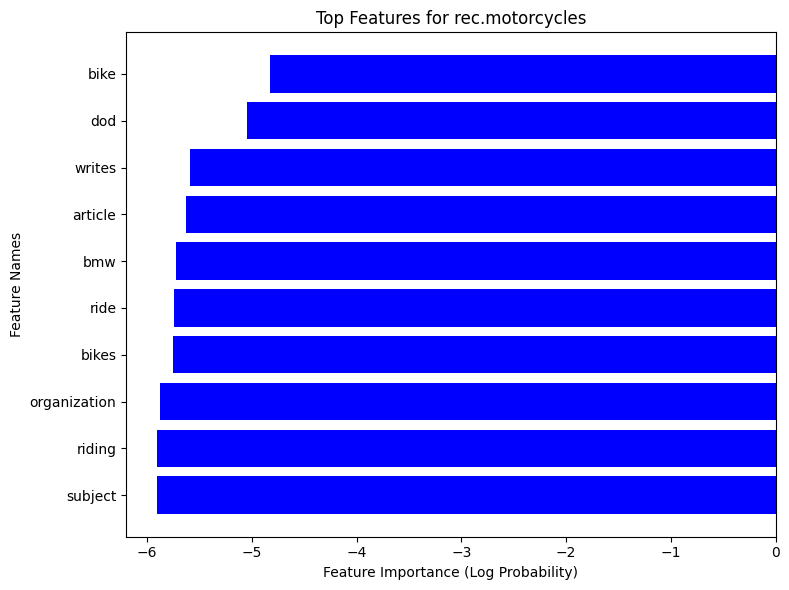


Top features for rec.sport.baseball: subject, organization, writes, braves, games, players, year, team, game, baseball


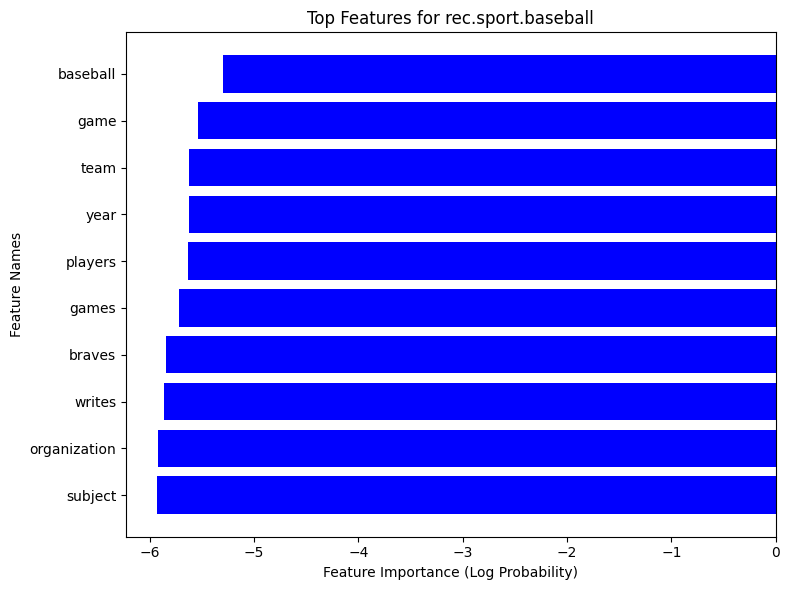


Top features for rec.sport.hockey: university, season, players, play, espn, games, nhl, team, hockey, game


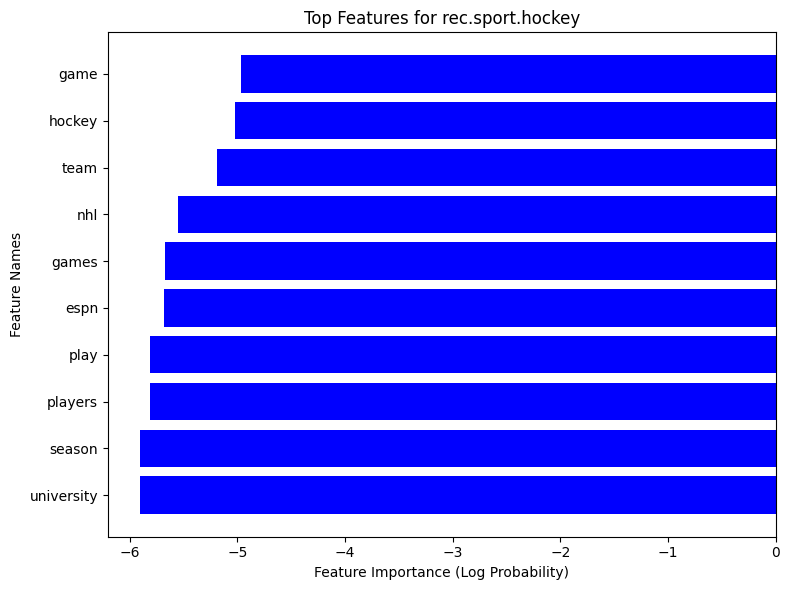


Top features for sci.crypt: escrow, algorithm, crypto, clipper chip, government, keys, chip, encryption, key, clipper


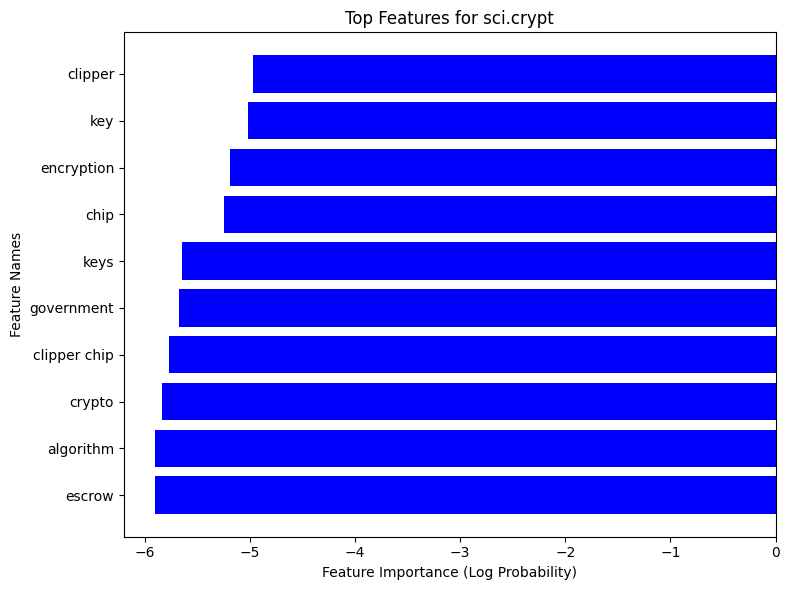


Top features for sci.electronics: copy, circuit, nntppostinghost, does, know, university, use, organization, subject, lines


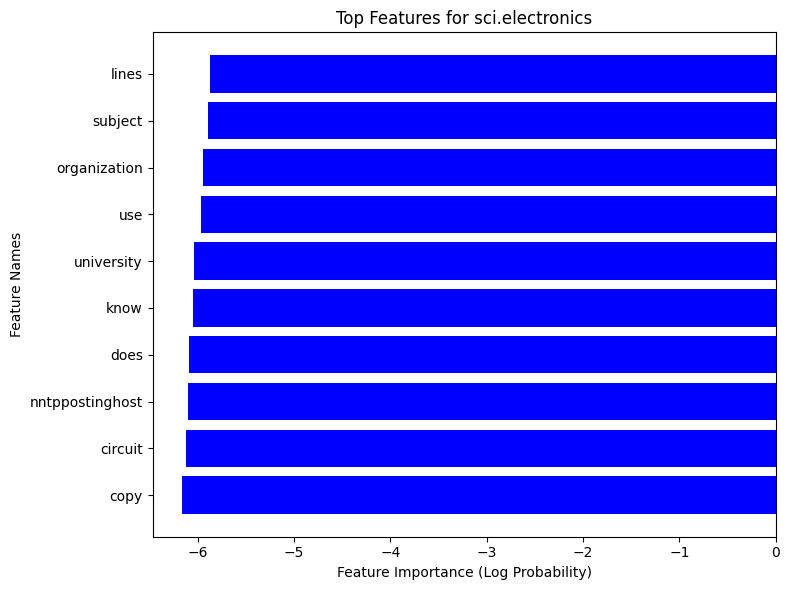


Top features for sci.med: doctor, lines, article, organization, subject, msg, medical, gordon, banks, gordon banks


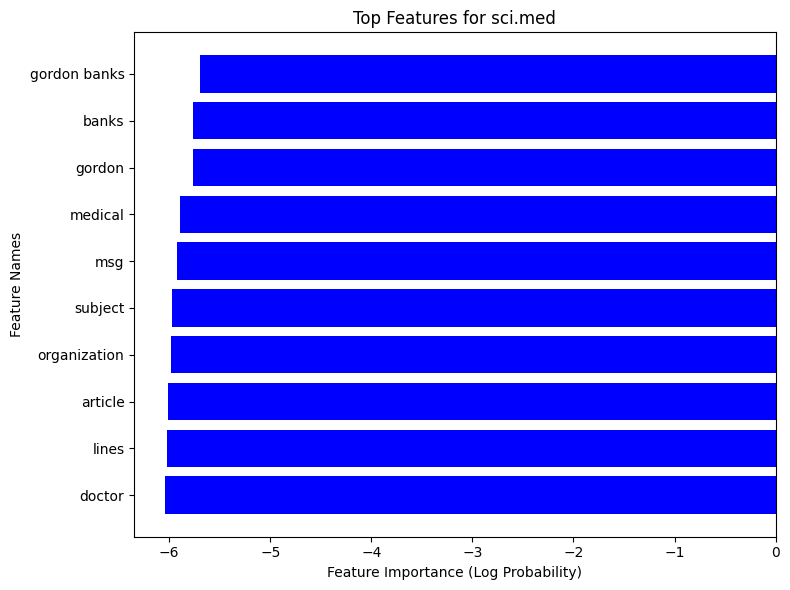


Top features for sci.space: article, launch, nasa, sky, writes, pat, orbit, moon, shuttle, space


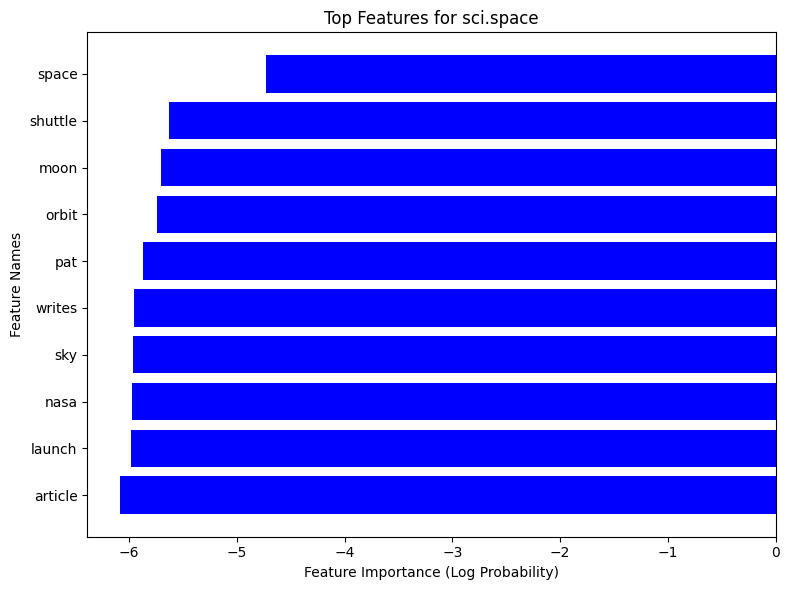


Top features for soc.religion.christian: christianity, sin, christ, people, bible, christian, christians, church, jesus, god


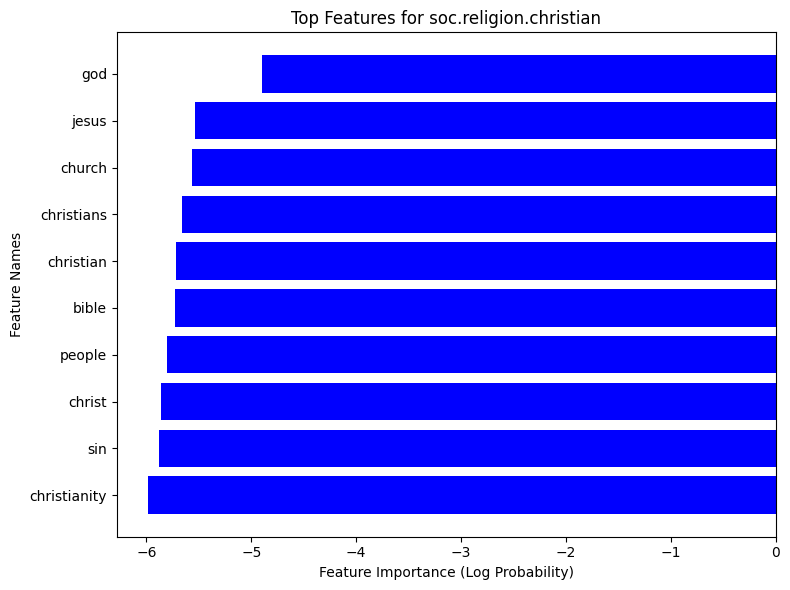


Top features for talk.politics.guns: article, batf, writes, government, atf, waco, people, guns, fbi, gun


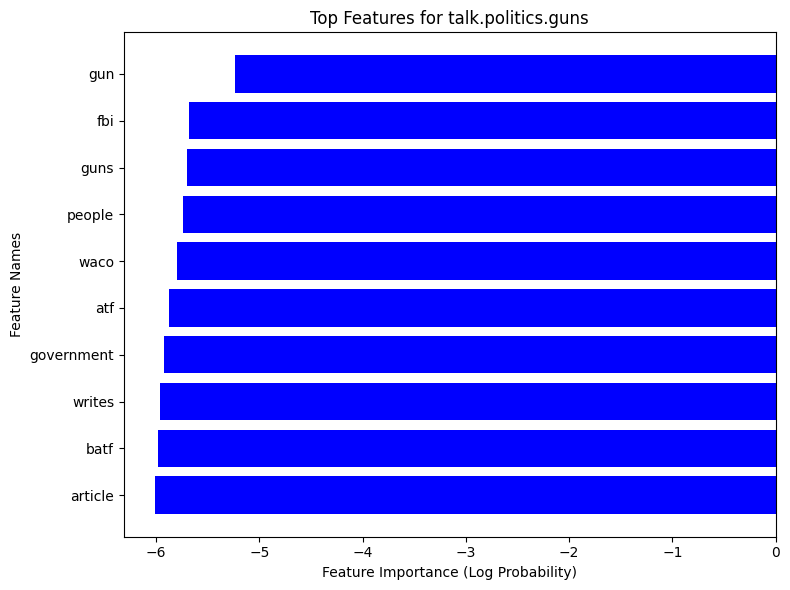


Top features for talk.politics.mideast: writes, jewish, armenians, people, turkish, armenian, arab, jews, israeli, israel


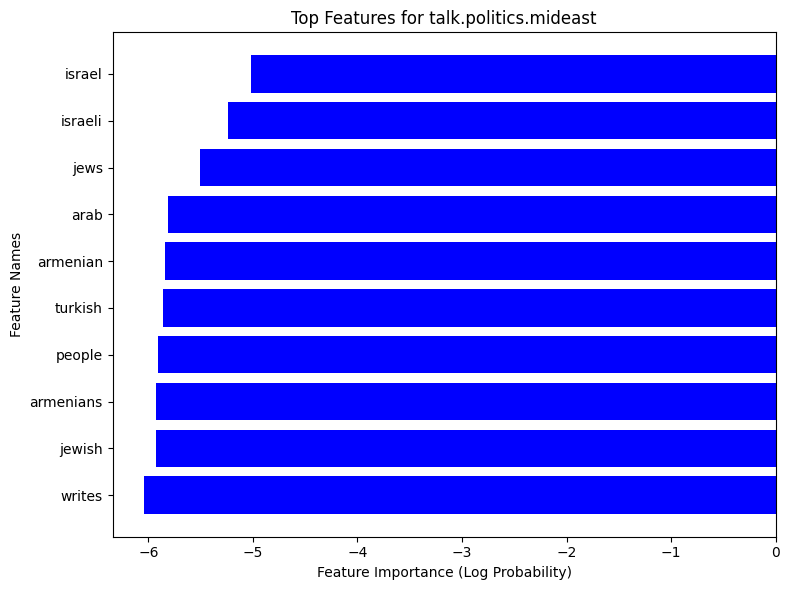


Top features for talk.politics.misc: dont, just, clayton cramer, government, gay, cramer, clayton, article, writes, people


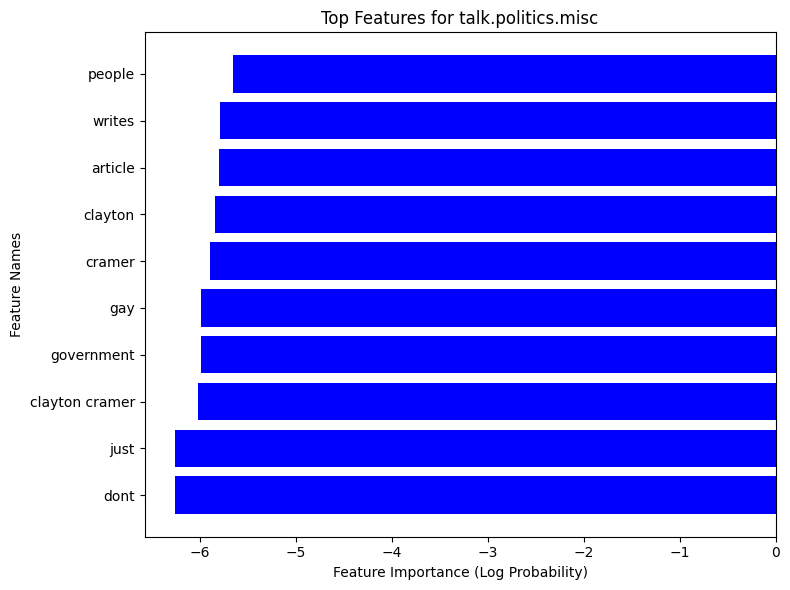


Top features for talk.religion.misc: kent, sandviknewtonapplecom, people, bible, article, koresh, writes, christian, jesus, god


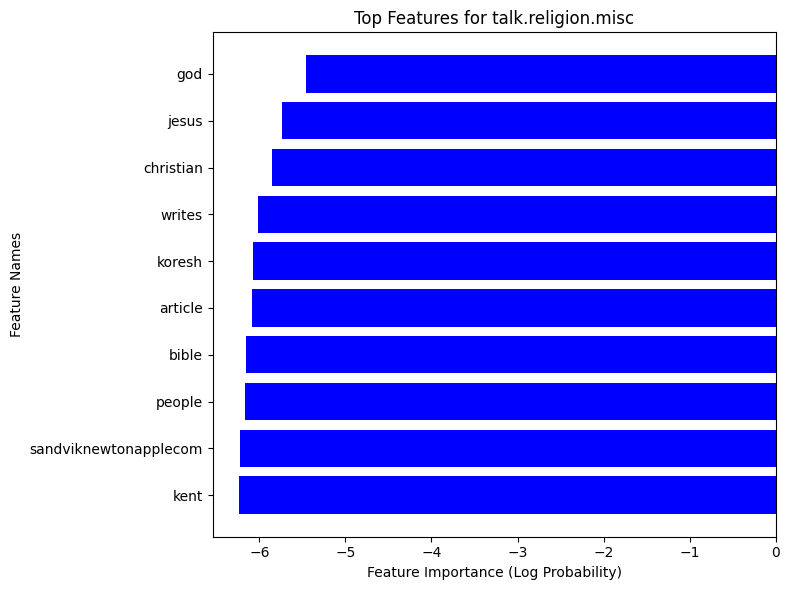

In [11]:
# Import required libraries
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# 1. Load the dataset with all categories
print("Loading the '20 Newsgroups' dataset...")
categories = None  # Load all 20 categories
data = fetch_20newsgroups(subset="all", categories=categories, shuffle=True, random_state=42)

# 2. Preprocessing: Custom Text Cleaning Function
print("Cleaning and preprocessing text data...")

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

cleaned_data = [preprocess_text(doc) for doc in data.data]

# 3. TF-IDF Vectorization
print("Vectorizing text data using TF-IDF with n-grams...")
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",  # Built-in stopword removal
    max_features=5000,  # Increased feature space
    ngram_range=(1, 2),  # Include unigrams and bigrams
)
X = tfidf_vectorizer.fit_transform(cleaned_data)  # Convert text to TF-IDF feature matrix
y = data.target  # Labels

# 4. Train-test split
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train the Naive Bayes classifier
print("Training the Naive Bayes classifier with optimized parameters...")
nb_classifier = MultinomialNB(alpha=0.5)  # Lower alpha for better smoothing
nb_classifier.fit(X_train, y_train)

# 6. Predictions
print("Predicting on the test set...")
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)  # For AUC-ROC calculation

# 7. Evaluation Metrics
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names)
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 8. AUC-ROC for Multi-Class
print("Calculating AUC-ROC for multi-class classification...")
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=np.arange(len(data.target_names)))
auc_roc_score = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"AUC-ROC (macro-average, one-vs-rest): {auc_roc_score:.4f}")

# 9. Visualizing Top Features for Each Category
print("Visualizing top features for each category...")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, category in enumerate(data.target_names):
    # Use feature_log_prob_ for MultinomialNB
    top_features = np.argsort(nb_classifier.feature_log_prob_[i])[-10:]  # Top 10 features
    print(f"\nTop features for {category}: {', '.join(feature_names[top_features])}")

    # Plotting the top features
    plt.figure(figsize=(8, 6))
    plt.barh(
        feature_names[top_features],
        nb_classifier.feature_log_prob_[i][top_features],
        color="blue",
    )
    plt.title(f"Top Features for {category}")
    plt.xlabel("Feature Importance (Log Probability)")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()


Loading the '20 Newsgroups' dataset...
Cleaning and preprocessing text data...
Vectorizing text data using TF-IDF with n-grams...
Splitting the dataset into train and test sets...
Training the Naive Bayes classifier with optimized parameters...
Predicting on the test set...
Evaluating the classifier...
Accuracy: 0.8447

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       236
           comp.graphics       0.62      0.80      0.70       287
 comp.os.ms-windows.misc       0.77      0.80      0.78       290
comp.sys.ibm.pc.hardware       0.67      0.74      0.71       285
   comp.sys.mac.hardware       0.84      0.79      0.81       312
          comp.windows.x       0.86      0.83      0.84       308
            misc.forsale       0.80      0.80      0.80       276
               rec.autos       0.89      0.89      0.89       304
         rec.motorcycles       0.91      0.92      0.92     

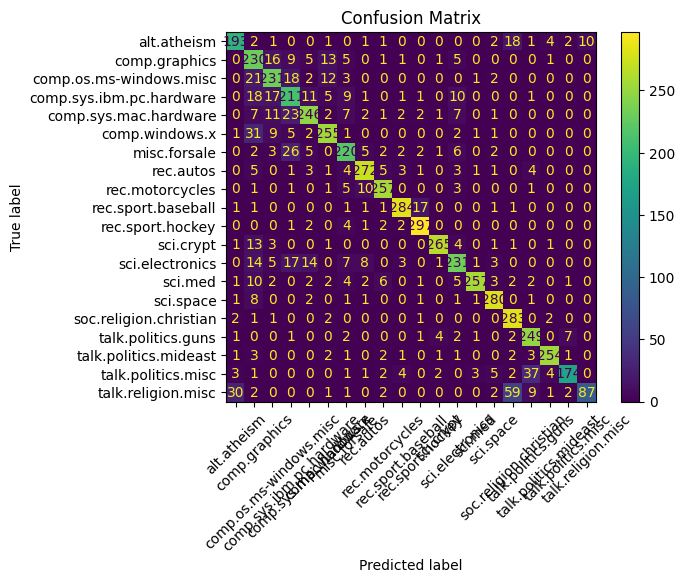

Calculating AUC-ROC for multi-class classification...
AUC-ROC (macro-average, one-vs-rest): 0.9909
Visualizing top features for each category...

Top features for alt.atheism: moral, dont, people, atheism, article, morality, writes, keith, atheists, god


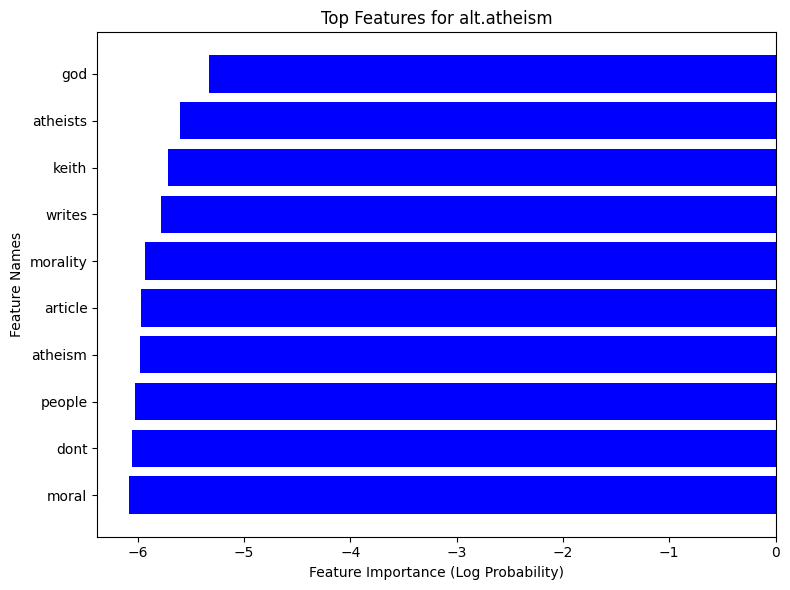


Top features for comp.graphics: file, thanks, files, images, organization, lines, subject, university, image, graphics


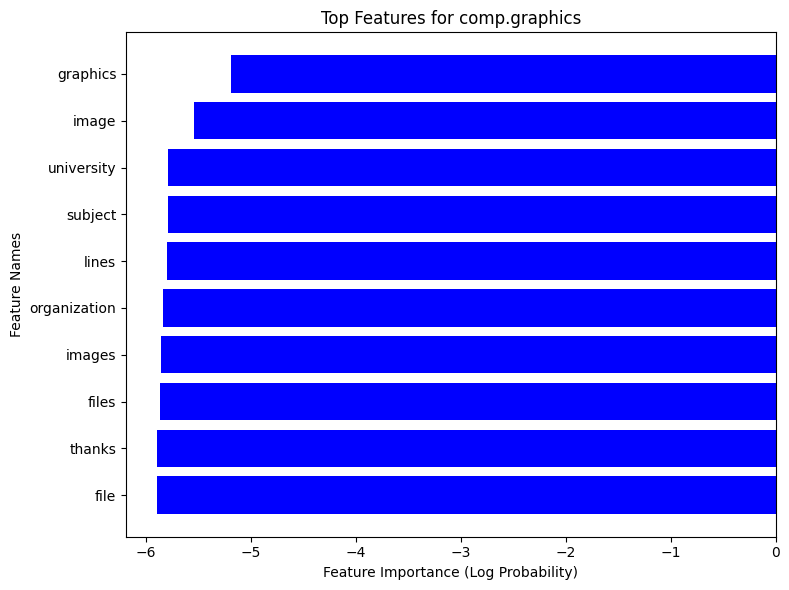


Top features for comp.os.ms-windows.misc: organization, subject, lines, university, driver, microsoft, files, file, dos, windows


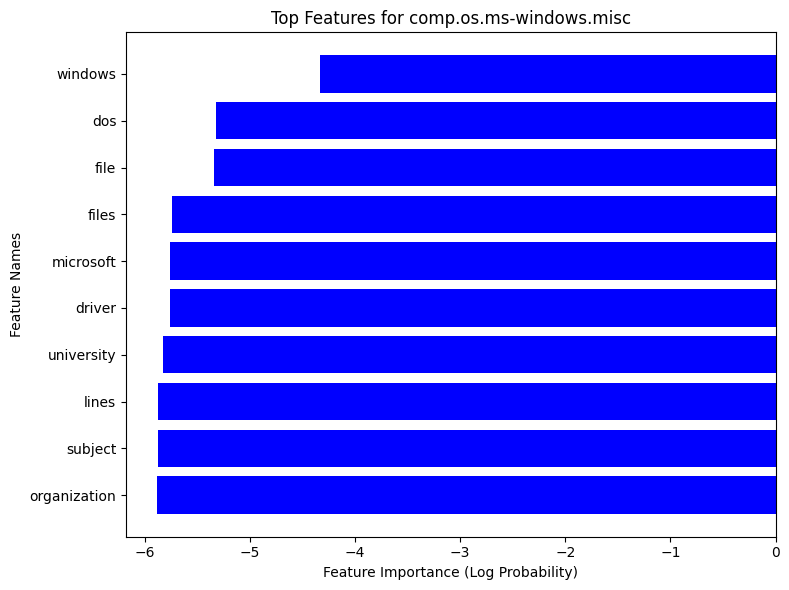


Top features for comp.sys.ibm.pc.hardware: dos, monitor, mb, bus, controller, dx, ide, card, scsi, drive


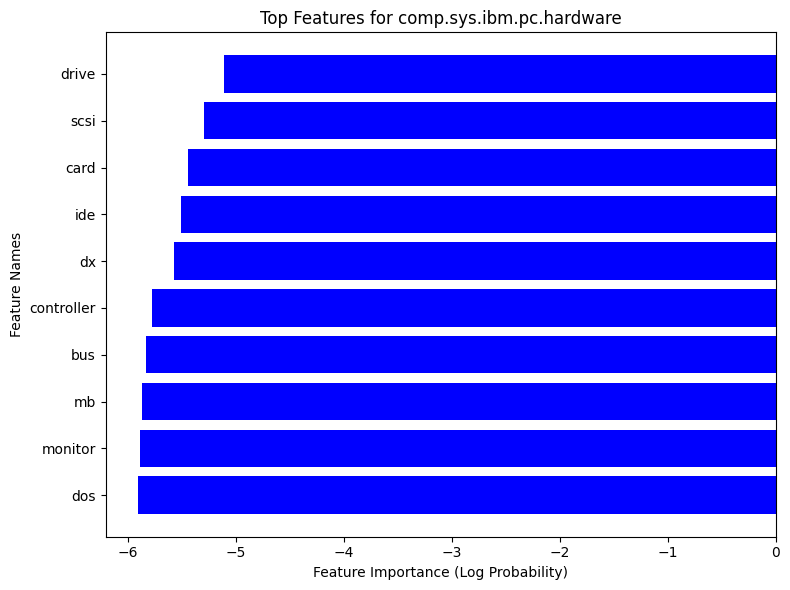


Top features for comp.sys.mac.hardware: quadra, organization, university, subject, lines, drive, monitor, centris, apple, mac


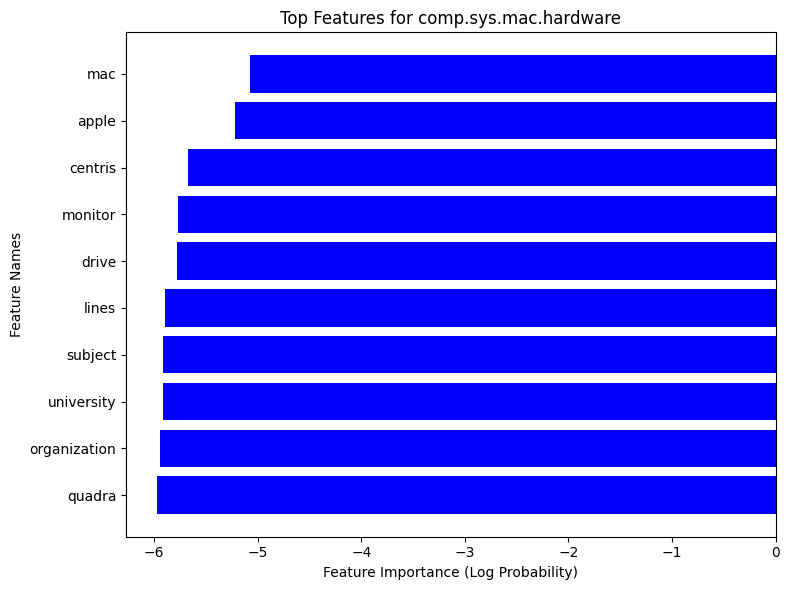


Top features for comp.windows.x: use, thanks, subject, organization, lines, server, xterm, xr, motif, window


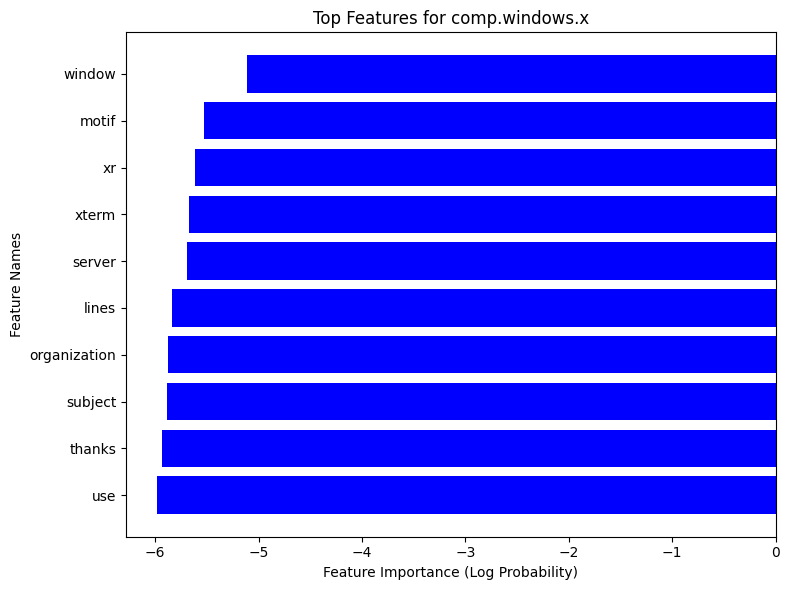


Top features for misc.forsale: distribution, organization, lines, subject, university, condition, email, offer, shipping, sale


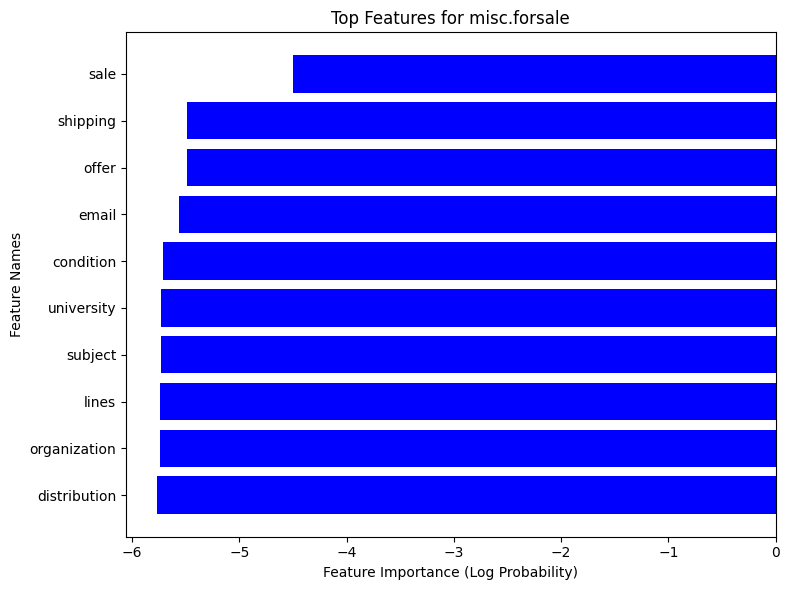


Top features for rec.autos: just, oil, lines, organization, subject, article, writes, engine, cars, car


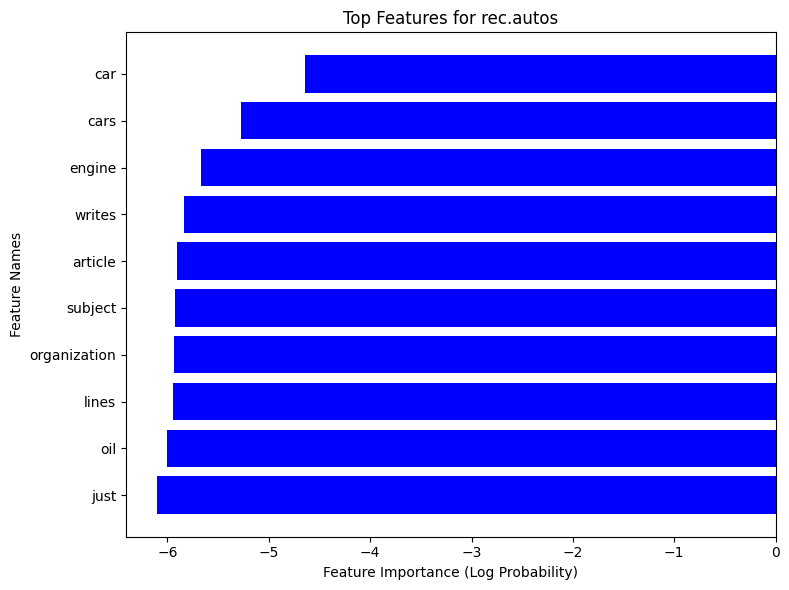


Top features for rec.motorcycles: subject, riding, organization, bikes, ride, bmw, article, writes, dod, bike


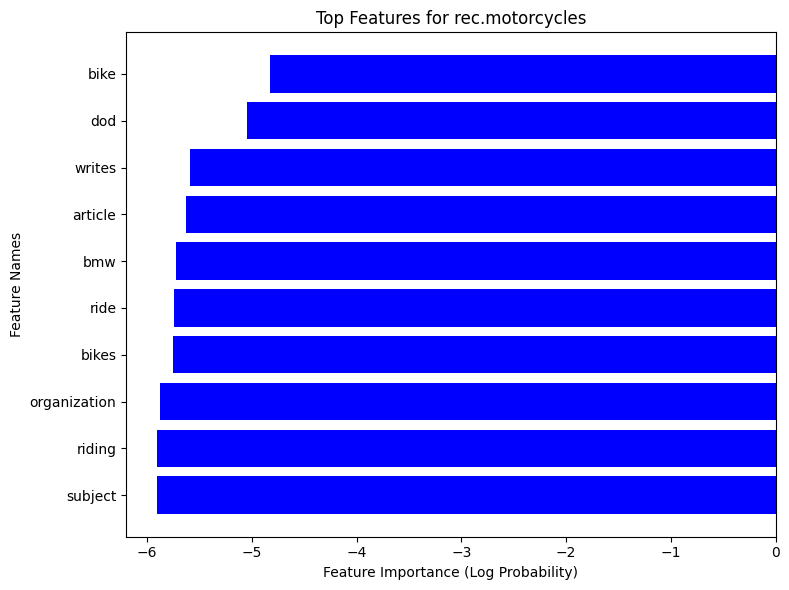


Top features for rec.sport.baseball: subject, organization, writes, braves, games, players, year, team, game, baseball


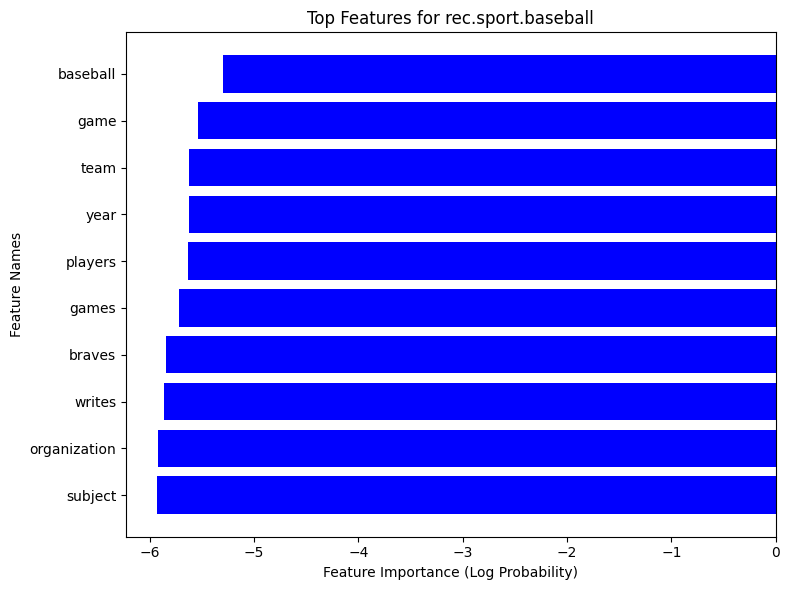


Top features for rec.sport.hockey: university, season, players, play, espn, games, nhl, team, hockey, game


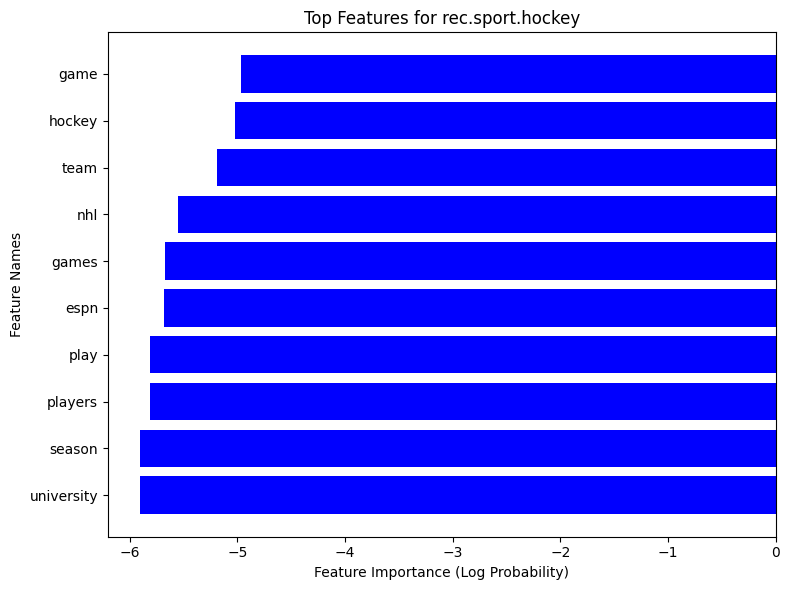


Top features for sci.crypt: escrow, algorithm, crypto, clipper chip, government, keys, chip, encryption, key, clipper


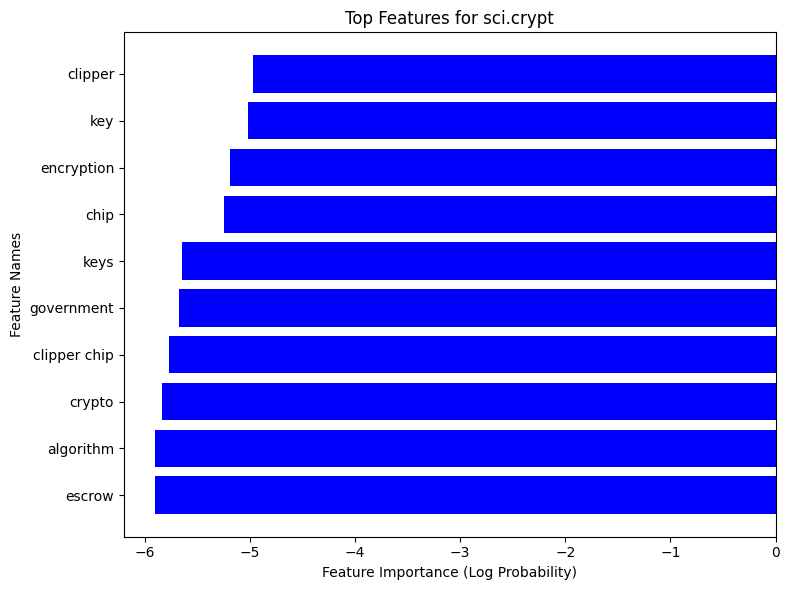


Top features for sci.electronics: copy, circuit, nntppostinghost, does, know, university, use, organization, subject, lines


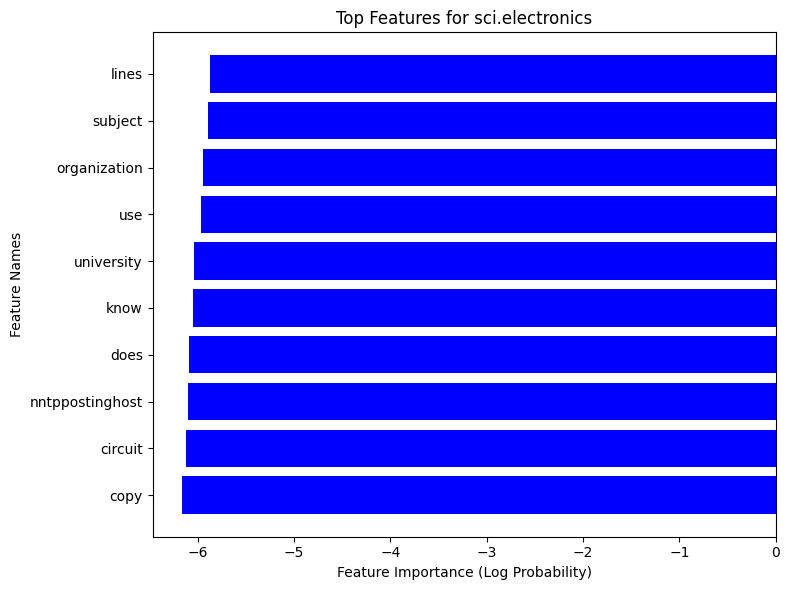


Top features for sci.med: doctor, lines, article, organization, subject, msg, medical, gordon, banks, gordon banks


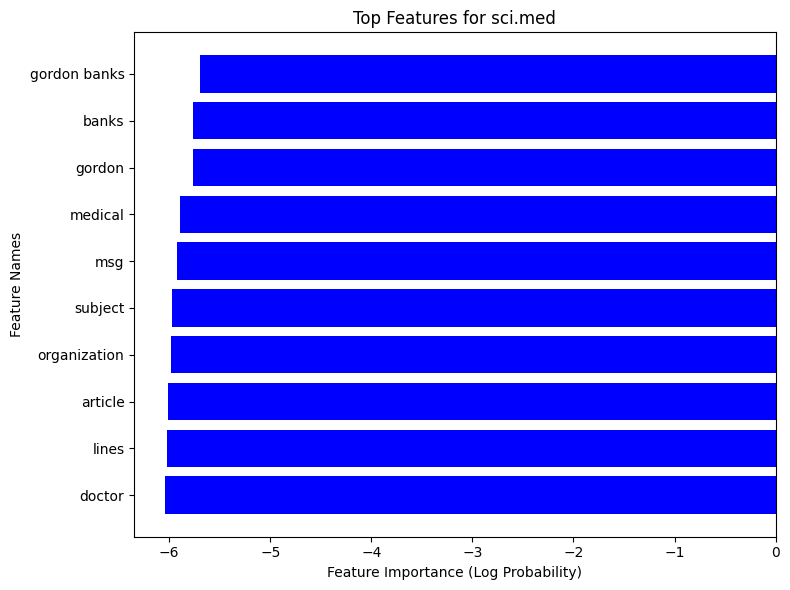


Top features for sci.space: article, launch, nasa, sky, writes, pat, orbit, moon, shuttle, space


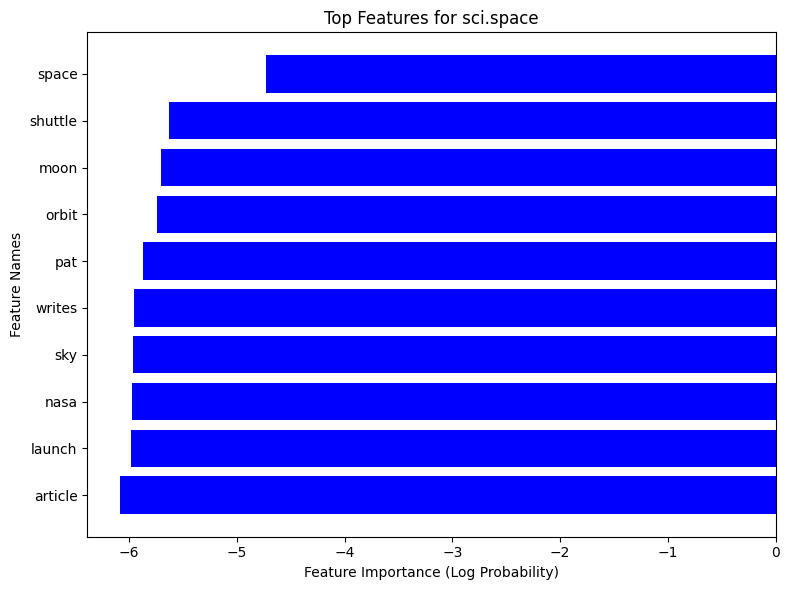


Top features for soc.religion.christian: christianity, sin, christ, people, bible, christian, christians, church, jesus, god


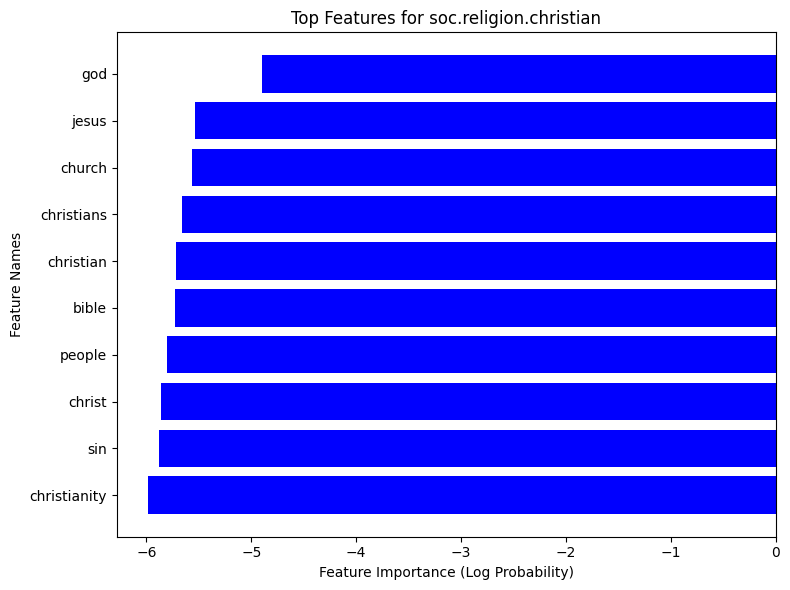


Top features for talk.politics.guns: article, batf, writes, government, atf, waco, people, guns, fbi, gun


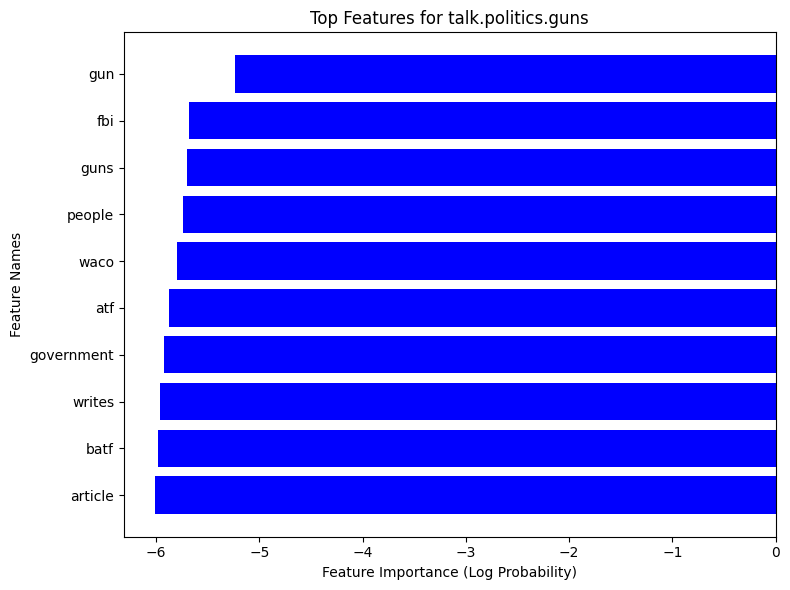


Top features for talk.politics.mideast: writes, jewish, armenians, people, turkish, armenian, arab, jews, israeli, israel


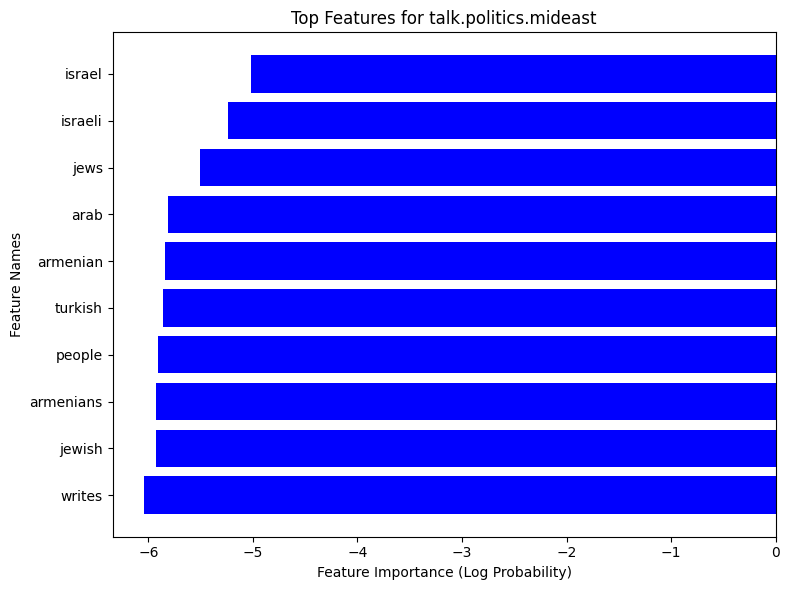


Top features for talk.politics.misc: dont, just, clayton cramer, government, gay, cramer, clayton, article, writes, people


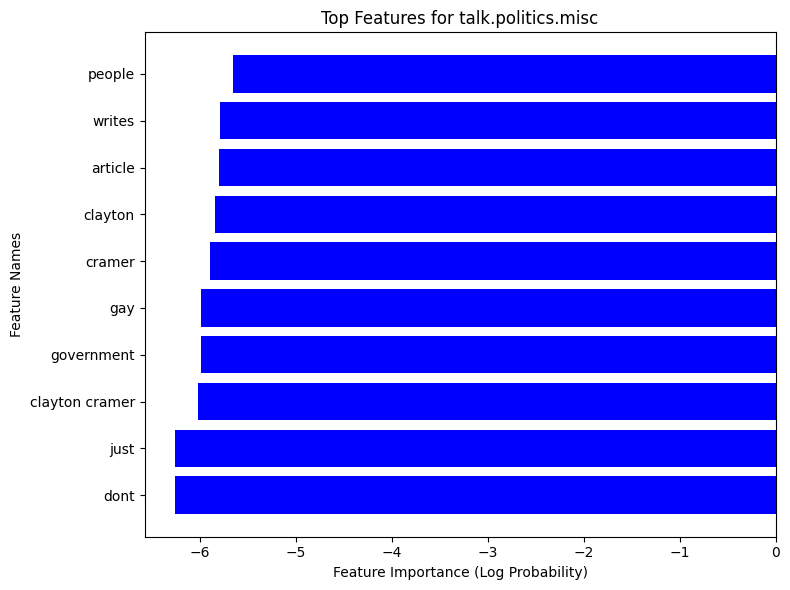


Top features for talk.religion.misc: kent, sandviknewtonapplecom, people, bible, article, koresh, writes, christian, jesus, god


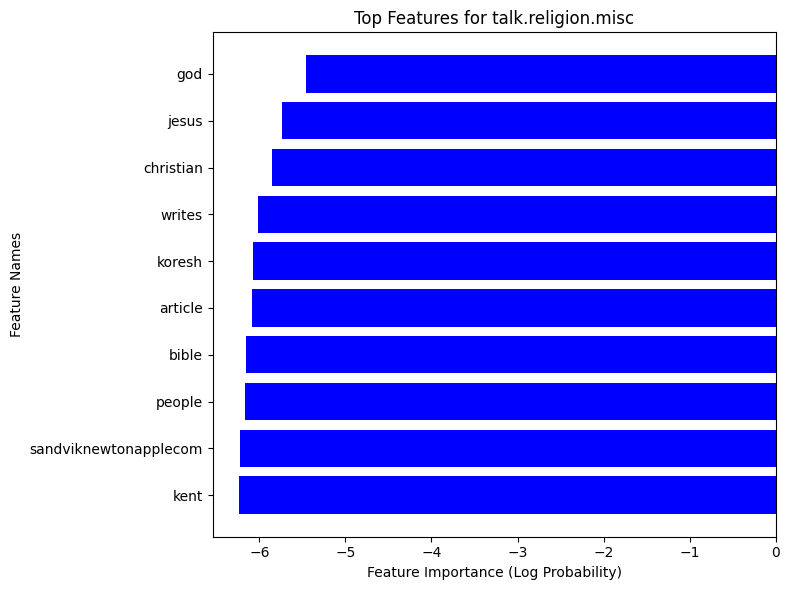

In [12]:
# Import required libraries
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# 1. Load the dataset with all categories
print("Loading the '20 Newsgroups' dataset...")
categories = None  # Load all 20 categories
data = fetch_20newsgroups(subset="all", categories=categories, shuffle=True, random_state=42)

# 2. Preprocessing: Custom Text Cleaning Function
print("Cleaning and preprocessing text data...")

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

cleaned_data = [preprocess_text(doc) for doc in data.data]

# 3. TF-IDF Vectorization
print("Vectorizing text data using TF-IDF with n-grams...")
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",  # Built-in stopword removal
    max_features=5000,  # Increased feature space
    ngram_range=(1, 2),  # Include unigrams and bigrams
)
X = tfidf_vectorizer.fit_transform(cleaned_data)  # Convert text to TF-IDF feature matrix
y = data.target  # Labels

# 4. Train-test split
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train the Naive Bayes classifier
print("Training the Naive Bayes classifier with optimized parameters...")
nb_classifier = MultinomialNB(alpha=0.5)  # Lower alpha for better smoothing
nb_classifier.fit(X_train, y_train)

# 6. Predictions
print("Predicting on the test set...")
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)  # For AUC-ROC calculation

# 7. Evaluation Metrics
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names)
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 8. AUC-ROC for Multi-Class
print("Calculating AUC-ROC for multi-class classification...")
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=np.arange(len(data.target_names)))
auc_roc_score = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"AUC-ROC (macro-average, one-vs-rest): {auc_roc_score:.4f}")

# 9. Visualizing Top Features for Each Category
print("Visualizing top features for each category...")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, category in enumerate(data.target_names):
    # Use feature_log_prob_ for MultinomialNB
    top_features = np.argsort(nb_classifier.feature_log_prob_[i])[-10:]  # Top 10 features
    print(f"\nTop features for {category}: {', '.join(feature_names[top_features])}")

    # Plotting the top features
    plt.figure(figsize=(8, 6))
    plt.barh(
        feature_names[top_features],
        nb_classifier.feature_log_prob_[i][top_features],
        color="blue",
    )
    plt.title(f"Top Features for {category}")
    plt.xlabel("Feature Importance (Log Probability)")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()


**Anohter Datast **

The IMDb Movie Reviews dataset consists of 50,000 movie reviews labeled as either positive or negative, split equally into training and testing sets. It is a binary classification task widely used for sentiment analysis. Using a Naive Bayes classifier with optimized parameters, the model achieved an accuracy of 84.45%, indicating strong performance. Both classes, negative and positive reviews, showed balanced precision (0.84-0.85) and recall (0.84-0.85), resulting in an F1-score of 0.84. The inclusion of bigrams and proper text preprocessing contributed to effective feature representation and consistent results across both classes.

Loading the IMDb Movie Reviews dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.EMF2CD_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.EMF2CD_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.EMF2CD_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Cleaning and preprocessing text data...
Vectorizing text data using TF-IDF with n-grams...
Training the Naive Bayes classifier with optimized parameters...
Predicting on the test set...
Evaluating the classifier...
Accuracy: 0.8445

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.84     12500
    Positive       0.85      0.84      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Generating confusion matrix...


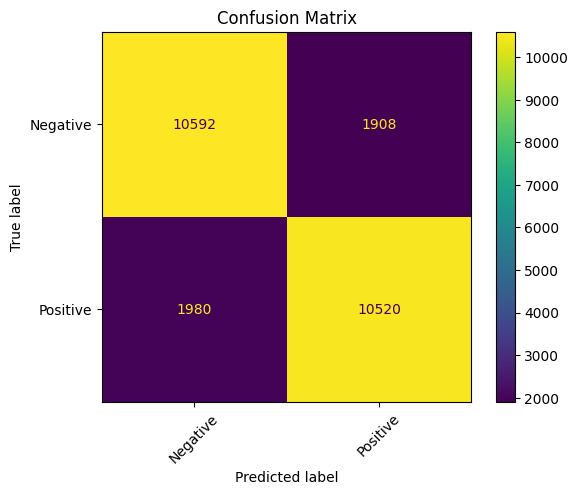

Visualizing top features for each class...

Top features for Negative: time, dont, really, good, bad, like, just, film, movie, br


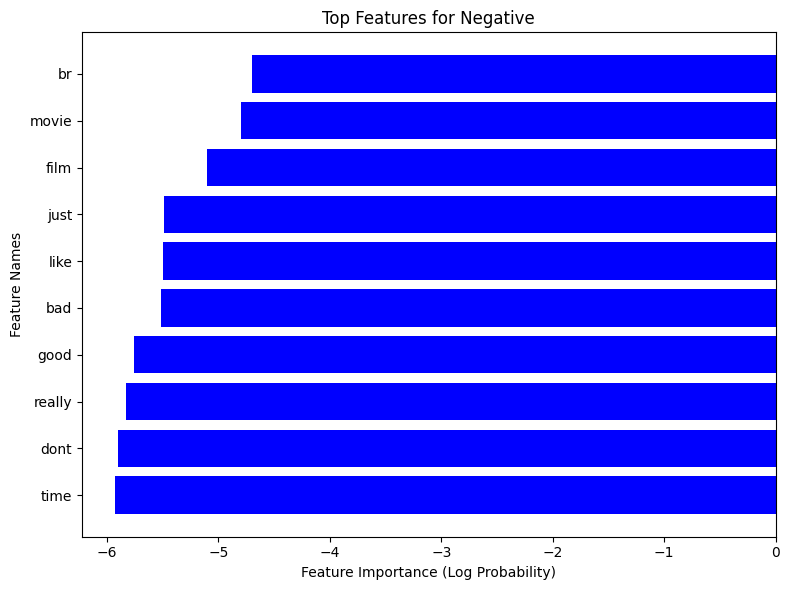


Top features for Positive: really, time, just, story, like, good, great, movie, film, br


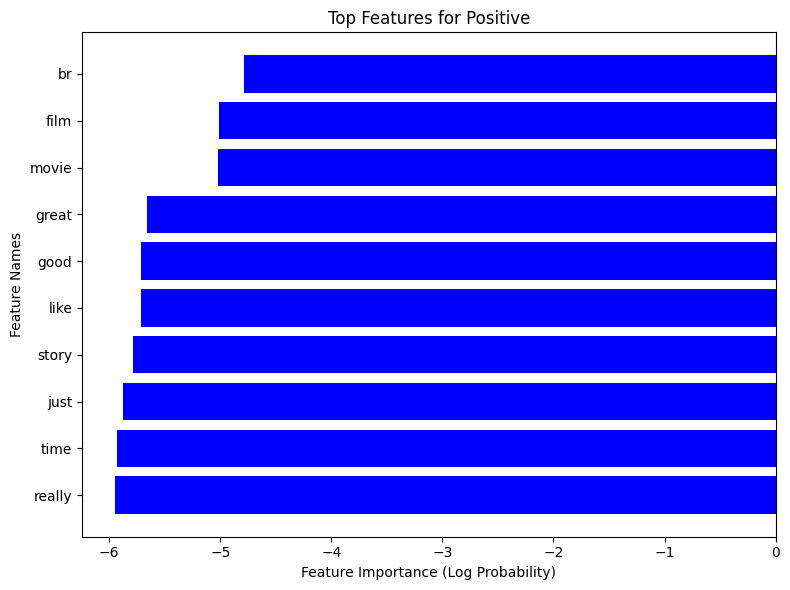

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
import tensorflow_datasets as tfds  # Use TensorFlow Datasets to load IMDb reviews

# 1. Load the IMDb Movie Reviews Dataset
print("Loading the IMDb Movie Reviews dataset...")
imdb_data = tfds.load('imdb_reviews', split='train', as_supervised=True)
imdb_test = tfds.load('imdb_reviews', split='test', as_supervised=True)

# Extract text and labels
def load_imdb_data(data):
    texts, labels = [], []
    for text, label in data:
        texts.append(text.numpy().decode('utf-8'))
        labels.append(int(label.numpy()))
    return texts, labels

train_texts, train_labels = load_imdb_data(imdb_data)
test_texts, test_labels = load_imdb_data(imdb_test)

# 2. Preprocessing: Custom Text Cleaning
print("Cleaning and preprocessing text data...")

import re

def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_texts = [preprocess_text(doc) for doc in train_texts]
test_texts = [preprocess_text(doc) for doc in test_texts]

# 3. TF-IDF Vectorization
print("Vectorizing text data using TF-IDF with n-grams...")
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",  # Built-in stopword removal
    max_features=5000,     # Increased feature space
    ngram_range=(1, 2),    # Include unigrams and bigrams
)
X_train = tfidf_vectorizer.fit_transform(train_texts)
X_test = tfidf_vectorizer.transform(test_texts)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 4. Train the Naive Bayes classifier
print("Training the Naive Bayes classifier with optimized parameters...")
nb_classifier = MultinomialNB(alpha=0.5)  # Optimized alpha for smoothing
nb_classifier.fit(X_train, y_train)

# 5. Predictions
print("Predicting on the test set...")
y_pred = nb_classifier.predict(X_test)

# 6. Evaluation Metrics
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Visualize top features for each class
print("Visualizing top features for each class...")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, label in enumerate(["Negative", "Positive"]):
    # Use feature_log_prob_ for MultinomialNB
    top_features = np.argsort(nb_classifier.feature_log_prob_[i])[-10:]  # Top 10 features
    print(f"\nTop features for {label}: {', '.join(feature_names[top_features])}")

    # Plotting the top features
    plt.figure(figsize=(8, 6))
    plt.barh(
        feature_names[top_features],
        nb_classifier.feature_log_prob_[i][top_features],
        color="blue",
    )
    plt.title(f"Top Features for {label}")
    plt.xlabel("Feature Importance (Log Probability)")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()
